In [1]:
from python_experiments.q_learning import QNet, SVODataset, SVODatasetFromLog
import numpy as np
import matplotlib.pyplot as plt

In [92]:
log_directories = [ "/home/nbuckman/mpc_results/02_17_txe/108f-3035-20210216-213718/108f-3035-20210216-213718_00000/", "/home/nbuckman/mpc_results/02_17_txe/108f-3035-20210216-213718/108f-3035-20210216-213718_00001/", "/home/nbuckman/mpc_results/02_17_txe/108f-3035-20210216-213718/108f-3035-20210216-213718_00002/", "/home/nbuckman/mpc_results/02_17_txe/108f-3035-20210216-213718/108f-3035-20210216-213718_00003/", "/home/nbuckman/mpc_results/02_17_txe/108f-3035-20210216-213718/108f-3035-20210216-213718_00004/", "/home/nbuckman/mpc_results/02_17_txe/108f-3035-20210216-213718/108f-3035-20210216-213718_00005/", "/home/nbuckman/mpc_results/02_17_txe/108f-3035-20210216-213718/108f-3035-20210216-213718_00006/", "/home/nbuckman/mpc_results/02_17_txe/108f-3035-20210216-213718/108f-3035-20210216-213718_00007/", "/home/nbuckman/mpc_results/02_17_txe/108f-3035-20210216-213718/108f-3035-20210216-213718_00008/", "/home/nbuckman/mpc_results/02_17_txe/108f-3035-20210216-213718/108f-3035-20210216-213718_00009/", "/home/nbuckman/mpc_results/02_17_txe/108f-3035-20210216-213718/108f-3035-20210216-213718_00010/", "/home/nbuckman/mpc_results/02_17_txe/108f-3035-20210216-213718/108f-3035-20210216-213718_00011/", "/home/nbuckman/mpc_results/02_17_txe/108f-3035-20210216-213718/108f-3035-20210216-213718_00012/", "/home/nbuckman/mpc_results/02_17_txe/108f-3035-20210216-213718/108f-3035-20210216-213718_00013/", "/home/nbuckman/mpc_results/02_17_txe/108f-3035-20210216-213718/108f-3035-20210216-213718_00014/", "/home/nbuckman/mpc_results/02_17_txe/108f-3035-20210216-213718/108f-3035-20210216-213718_00015/", "/home/nbuckman/mpc_results/02_17_txe/108f-3035-20210216-213718/108f-3035-20210216-213718_00016/", "/home/nbuckman/mpc_results/02_17_txe/108f-3035-20210216-213718/108f-3035-20210216-213718_00017/", "/home/nbuckman/mpc_results/02_17_txe/108f-3035-20210216-213718/108f-3035-20210216-213718_00018/", "/home/nbuckman/mpc_results/02_17_txe/108f-3035-20210216-213718/108f-3035-20210216-213718_00019/", "/home/nbuckman/mpc_results/02_17_txe/108f-3035-20210216-213718/108f-3035-20210216-213718_00020/", "/home/nbuckman/mpc_results/02_17_txe/108f-3035-20210216-213718/108f-3035-20210216-213718_00021/", "/home/nbuckman/mpc_results/02_17_txe/108f-3035-20210216-213718/108f-3035-20210216-213718_00022/", "/home/nbuckman/mpc_results/02_17_txe/108f-3035-20210216-213718/108f-3035-20210216-213718_00023/", "/home/nbuckman/mpc_results/02_17_txe/108f-3035-20210216-213718/108f-3035-20210216-213718_00024/", "/home/nbuckman/mpc_results/02_17_txe/19h3-eg9b-20210216-213718/19h3-eg9b-20210216-213718_00000/", "/home/nbuckman/mpc_results/02_17_txe/19h3-eg9b-20210216-213718/19h3-eg9b-20210216-213718_00001/", "/home/nbuckman/mpc_results/02_17_txe/19h3-eg9b-20210216-213718/19h3-eg9b-20210216-213718_00002/", "/home/nbuckman/mpc_results/02_17_txe/19h3-eg9b-20210216-213718/19h3-eg9b-20210216-213718_00003/", "/home/nbuckman/mpc_results/02_17_txe/19h3-eg9b-20210216-213718/19h3-eg9b-20210216-213718_00004/", "/home/nbuckman/mpc_results/02_17_txe/19h3-eg9b-20210216-213718/19h3-eg9b-20210216-213718_00005/", "/home/nbuckman/mpc_results/02_17_txe/19h3-eg9b-20210216-213718/19h3-eg9b-20210216-213718_00006/", "/home/nbuckman/mpc_results/02_17_txe/19h3-eg9b-20210216-213718/19h3-eg9b-20210216-213718_00007/", "/home/nbuckman/mpc_results/02_17_txe/19h3-eg9b-20210216-213718/19h3-eg9b-20210216-213718_00008/", "/home/nbuckman/mpc_results/02_17_txe/19h3-eg9b-20210216-213718/19h3-eg9b-20210216-213718_00009/", "/home/nbuckman/mpc_results/02_17_txe/19h3-eg9b-20210216-213718/19h3-eg9b-20210216-213718_00010/", "/home/nbuckman/mpc_results/02_17_txe/19h3-eg9b-20210216-213718/19h3-eg9b-20210216-213718_00011/", "/home/nbuckman/mpc_results/02_17_txe/19h3-eg9b-20210216-213718/19h3-eg9b-20210216-213718_00012/", "/home/nbuckman/mpc_results/02_17_txe/19h3-eg9b-20210216-213718/19h3-eg9b-20210216-213718_00013/", "/home/nbuckman/mpc_results/02_17_txe/19h3-eg9b-20210216-213718/19h3-eg9b-20210216-213718_00014/", "/home/nbuckman/mpc_results/02_17_txe/19h3-eg9b-20210216-213718/19h3-eg9b-20210216-213718_00015/", "/home/nbuckman/mpc_results/02_17_txe/19h3-eg9b-20210216-213718/19h3-eg9b-20210216-213718_00016/", "/home/nbuckman/mpc_results/02_17_txe/19h3-eg9b-20210216-213718/19h3-eg9b-20210216-213718_00017/", "/home/nbuckman/mpc_results/02_17_txe/19h3-eg9b-20210216-213718/19h3-eg9b-20210216-213718_00018/", "/home/nbuckman/mpc_results/02_17_txe/19h3-eg9b-20210216-213718/19h3-eg9b-20210216-213718_00019/", "/home/nbuckman/mpc_results/02_17_txe/19h3-eg9b-20210216-213718/19h3-eg9b-20210216-213718_00020/", "/home/nbuckman/mpc_results/02_17_txe/19h3-eg9b-20210216-213718/19h3-eg9b-20210216-213718_00021/", "/home/nbuckman/mpc_results/02_17_txe/19h3-eg9b-20210216-213718/19h3-eg9b-20210216-213718_00022/", "/home/nbuckman/mpc_results/02_17_txe/19h3-eg9b-20210216-213718/19h3-eg9b-20210216-213718_00023/", "/home/nbuckman/mpc_results/02_17_txe/19h3-eg9b-20210216-213718/19h3-eg9b-20210216-213718_00024/", "/home/nbuckman/mpc_results/02_17_txe/1b5a-4a7e-20210216-161644/1b5a-4a7e-20210216-161644_00000/", "/home/nbuckman/mpc_results/02_17_txe/1b5a-4a7e-20210216-161644/1b5a-4a7e-20210216-161644_00001/", "/home/nbuckman/mpc_results/02_17_txe/1b5a-4a7e-20210216-161644/1b5a-4a7e-20210216-161644_00002/", "/home/nbuckman/mpc_results/02_17_txe/1b5a-4a7e-20210216-161644/1b5a-4a7e-20210216-161644_00003/", "/home/nbuckman/mpc_results/02_17_txe/1b5a-4a7e-20210216-161644/1b5a-4a7e-20210216-161644_00004/", "/home/nbuckman/mpc_results/02_17_txe/1b5a-4a7e-20210216-161644/1b5a-4a7e-20210216-161644_00005/", "/home/nbuckman/mpc_results/02_17_txe/1b5a-4a7e-20210216-161644/1b5a-4a7e-20210216-161644_00006/", "/home/nbuckman/mpc_results/02_17_txe/1b5a-4a7e-20210216-161644/1b5a-4a7e-20210216-161644_00007/", "/home/nbuckman/mpc_results/02_17_txe/1b5a-4a7e-20210216-161644/1b5a-4a7e-20210216-161644_00008/", "/home/nbuckman/mpc_results/02_17_txe/1b5a-4a7e-20210216-161644/1b5a-4a7e-20210216-161644_00009/", "/home/nbuckman/mpc_results/02_17_txe/1f4b-2f0c-20210216-161358/1f4b-2f0c-20210216-161358_00000/", "/home/nbuckman/mpc_results/02_17_txe/1f4b-2f0c-20210216-161358/1f4b-2f0c-20210216-161358_00001/", "/home/nbuckman/mpc_results/02_17_txe/1f4b-2f0c-20210216-161358/1f4b-2f0c-20210216-161358_00002/", "/home/nbuckman/mpc_results/02_17_txe/1f4b-2f0c-20210216-161358/1f4b-2f0c-20210216-161358_00003/", "/home/nbuckman/mpc_results/02_17_txe/1f4b-2f0c-20210216-161358/1f4b-2f0c-20210216-161358_00004/", "/home/nbuckman/mpc_results/02_17_txe/1f4b-2f0c-20210216-161358/1f4b-2f0c-20210216-161358_00005/", "/home/nbuckman/mpc_results/02_17_txe/1f4b-2f0c-20210216-161358/1f4b-2f0c-20210216-161358_00006/", "/home/nbuckman/mpc_results/02_17_txe/1f4b-2f0c-20210216-161358/1f4b-2f0c-20210216-161358_00007/", "/home/nbuckman/mpc_results/02_17_txe/1f4b-2f0c-20210216-161358/1f4b-2f0c-20210216-161358_00008/", "/home/nbuckman/mpc_results/02_17_txe/1f4b-2f0c-20210216-161358/1f4b-2f0c-20210216-161358_00009/", "/home/nbuckman/mpc_results/02_17_txe/2363-aa9e-20210216-161614/2363-aa9e-20210216-161614_00000/", "/home/nbuckman/mpc_results/02_17_txe/2363-aa9e-20210216-161614/2363-aa9e-20210216-161614_00001/", "/home/nbuckman/mpc_results/02_17_txe/2363-aa9e-20210216-161614/2363-aa9e-20210216-161614_00002/", "/home/nbuckman/mpc_results/02_17_txe/2363-aa9e-20210216-161614/2363-aa9e-20210216-161614_00003/", "/home/nbuckman/mpc_results/02_17_txe/2363-aa9e-20210216-161614/2363-aa9e-20210216-161614_00004/", "/home/nbuckman/mpc_results/02_17_txe/2363-aa9e-20210216-161614/2363-aa9e-20210216-161614_00005/", "/home/nbuckman/mpc_results/02_17_txe/2363-aa9e-20210216-161614/2363-aa9e-20210216-161614_00006/", "/home/nbuckman/mpc_results/02_17_txe/2363-aa9e-20210216-161614/2363-aa9e-20210216-161614_00007/", "/home/nbuckman/mpc_results/02_17_txe/2363-aa9e-20210216-161614/2363-aa9e-20210216-161614_00008/", "/home/nbuckman/mpc_results/02_17_txe/2363-aa9e-20210216-161614/2363-aa9e-20210216-161614_00009/", "/home/nbuckman/mpc_results/02_17_txe/23d1-093c-20210216-164440/23d1-093c-20210216-164440_00000/", "/home/nbuckman/mpc_results/02_17_txe/23d1-093c-20210216-164440/23d1-093c-20210216-164440_00001/", "/home/nbuckman/mpc_results/02_17_txe/23d1-093c-20210216-164440/23d1-093c-20210216-164440_00002/", "/home/nbuckman/mpc_results/02_17_txe/23d1-093c-20210216-164440/23d1-093c-20210216-164440_00003/", "/home/nbuckman/mpc_results/02_17_txe/23d1-093c-20210216-164440/23d1-093c-20210216-164440_00004/", "/home/nbuckman/mpc_results/02_17_txe/23d1-093c-20210216-164440/23d1-093c-20210216-164440_00005/", "/home/nbuckman/mpc_results/02_17_txe/23d1-093c-20210216-164440/23d1-093c-20210216-164440_00006/", "/home/nbuckman/mpc_results/02_17_txe/23d1-093c-20210216-164440/23d1-093c-20210216-164440_00007/", "/home/nbuckman/mpc_results/02_17_txe/23d1-093c-20210216-164440/23d1-093c-20210216-164440_00008/", "/home/nbuckman/mpc_results/02_17_txe/23d1-093c-20210216-164440/23d1-093c-20210216-164440_00009/", "/home/nbuckman/mpc_results/02_17_txe/23d1-093c-20210216-164440/23d1-093c-20210216-164440_00010/", "/home/nbuckman/mpc_results/02_17_txe/23d1-093c-20210216-164440/23d1-093c-20210216-164440_00011/", "/home/nbuckman/mpc_results/02_17_txe/23d1-093c-20210216-164440/23d1-093c-20210216-164440_00012/", "/home/nbuckman/mpc_results/02_17_txe/23d1-093c-20210216-164440/23d1-093c-20210216-164440_00013/", "/home/nbuckman/mpc_results/02_17_txe/23d1-093c-20210216-164440/23d1-093c-20210216-164440_00014/", "/home/nbuckman/mpc_results/02_17_txe/23d1-093c-20210216-164440/23d1-093c-20210216-164440_00015/", "/home/nbuckman/mpc_results/02_17_txe/23d1-093c-20210216-164440/23d1-093c-20210216-164440_00016/", "/home/nbuckman/mpc_results/02_17_txe/23d1-093c-20210216-164440/23d1-093c-20210216-164440_00017/", "/home/nbuckman/mpc_results/02_17_txe/23d1-093c-20210216-164440/23d1-093c-20210216-164440_00018/", "/home/nbuckman/mpc_results/02_17_txe/23d1-093c-20210216-164440/23d1-093c-20210216-164440_00019/", "/home/nbuckman/mpc_results/02_17_txe/23d1-093c-20210216-164440/23d1-093c-20210216-164440_00020/", "/home/nbuckman/mpc_results/02_17_txe/23d1-093c-20210216-164440/23d1-093c-20210216-164440_00021/", "/home/nbuckman/mpc_results/02_17_txe/23d1-093c-20210216-164440/23d1-093c-20210216-164440_00022/", "/home/nbuckman/mpc_results/02_17_txe/23d1-093c-20210216-164440/23d1-093c-20210216-164440_00023/", "/home/nbuckman/mpc_results/02_17_txe/23d1-093c-20210216-164440/23d1-093c-20210216-164440_00024/", "/home/nbuckman/mpc_results/02_17_txe/2568-g5e6-20210216-161358/2568-g5e6-20210216-161358_00000/", "/home/nbuckman/mpc_results/02_17_txe/2568-g5e6-20210216-161358/2568-g5e6-20210216-161358_00001/", "/home/nbuckman/mpc_results/02_17_txe/2568-g5e6-20210216-161358/2568-g5e6-20210216-161358_00002/", "/home/nbuckman/mpc_results/02_17_txe/2568-g5e6-20210216-161358/2568-g5e6-20210216-161358_00003/", "/home/nbuckman/mpc_results/02_17_txe/2568-g5e6-20210216-161358/2568-g5e6-20210216-161358_00004/", "/home/nbuckman/mpc_results/02_17_txe/2568-g5e6-20210216-161358/2568-g5e6-20210216-161358_00005/", "/home/nbuckman/mpc_results/02_17_txe/2568-g5e6-20210216-161358/2568-g5e6-20210216-161358_00006/", "/home/nbuckman/mpc_results/02_17_txe/2568-g5e6-20210216-161358/2568-g5e6-20210216-161358_00007/", "/home/nbuckman/mpc_results/02_17_txe/2568-g5e6-20210216-161358/2568-g5e6-20210216-161358_00008/", "/home/nbuckman/mpc_results/02_17_txe/2568-g5e6-20210216-161358/2568-g5e6-20210216-161358_00009/", "/home/nbuckman/mpc_results/02_17_txe/3138-6e4e-20210216-213718/3138-6e4e-20210216-213718_00000/", "/home/nbuckman/mpc_results/02_17_txe/3138-6e4e-20210216-213718/3138-6e4e-20210216-213718_00001/", "/home/nbuckman/mpc_results/02_17_txe/3138-6e4e-20210216-213718/3138-6e4e-20210216-213718_00002/", "/home/nbuckman/mpc_results/02_17_txe/3138-6e4e-20210216-213718/3138-6e4e-20210216-213718_00003/", "/home/nbuckman/mpc_results/02_17_txe/3138-6e4e-20210216-213718/3138-6e4e-20210216-213718_00004/", "/home/nbuckman/mpc_results/02_17_txe/3138-6e4e-20210216-213718/3138-6e4e-20210216-213718_00005/", "/home/nbuckman/mpc_results/02_17_txe/3138-6e4e-20210216-213718/3138-6e4e-20210216-213718_00006/", "/home/nbuckman/mpc_results/02_17_txe/3138-6e4e-20210216-213718/3138-6e4e-20210216-213718_00007/", "/home/nbuckman/mpc_results/02_17_txe/3138-6e4e-20210216-213718/3138-6e4e-20210216-213718_00008/", "/home/nbuckman/mpc_results/02_17_txe/3138-6e4e-20210216-213718/3138-6e4e-20210216-213718_00009/", "/home/nbuckman/mpc_results/02_17_txe/3138-6e4e-20210216-213718/3138-6e4e-20210216-213718_00010/", "/home/nbuckman/mpc_results/02_17_txe/3138-6e4e-20210216-213718/3138-6e4e-20210216-213718_00011/", "/home/nbuckman/mpc_results/02_17_txe/3138-6e4e-20210216-213718/3138-6e4e-20210216-213718_00012/", "/home/nbuckman/mpc_results/02_17_txe/3138-6e4e-20210216-213718/3138-6e4e-20210216-213718_00013/", "/home/nbuckman/mpc_results/02_17_txe/3138-6e4e-20210216-213718/3138-6e4e-20210216-213718_00014/", "/home/nbuckman/mpc_results/02_17_txe/3138-6e4e-20210216-213718/3138-6e4e-20210216-213718_00015/", "/home/nbuckman/mpc_results/02_17_txe/3138-6e4e-20210216-213718/3138-6e4e-20210216-213718_00016/", "/home/nbuckman/mpc_results/02_17_txe/3138-6e4e-20210216-213718/3138-6e4e-20210216-213718_00017/", "/home/nbuckman/mpc_results/02_17_txe/3138-6e4e-20210216-213718/3138-6e4e-20210216-213718_00018/", "/home/nbuckman/mpc_results/02_17_txe/3138-6e4e-20210216-213718/3138-6e4e-20210216-213718_00019/", "/home/nbuckman/mpc_results/02_17_txe/3138-6e4e-20210216-213718/3138-6e4e-20210216-213718_00020/", "/home/nbuckman/mpc_results/02_17_txe/3138-6e4e-20210216-213718/3138-6e4e-20210216-213718_00021/", "/home/nbuckman/mpc_results/02_17_txe/3138-6e4e-20210216-213718/3138-6e4e-20210216-213718_00022/", "/home/nbuckman/mpc_results/02_17_txe/3138-6e4e-20210216-213718/3138-6e4e-20210216-213718_00023/", "/home/nbuckman/mpc_results/02_17_txe/3138-6e4e-20210216-213718/3138-6e4e-20210216-213718_00024/", "/home/nbuckman/mpc_results/02_17_txe/33a3-938g-20210216-160008/33a3-938g-20210216-160008_00000/", "/home/nbuckman/mpc_results/02_17_txe/33a3-938g-20210216-160008/33a3-938g-20210216-160008_00001/", "/home/nbuckman/mpc_results/02_17_txe/358b-c5ce-20210218-142237/358b-c5ce-20210218-142237_00000/", "/home/nbuckman/mpc_results/02_17_txe/358b-c5ce-20210218-142237/358b-c5ce-20210218-142237_00001/", "/home/nbuckman/mpc_results/02_17_txe/358b-c5ce-20210218-142237/358b-c5ce-20210218-142237_00002/", "/home/nbuckman/mpc_results/02_17_txe/358b-c5ce-20210218-142237/358b-c5ce-20210218-142237_00003/", "/home/nbuckman/mpc_results/02_17_txe/358b-c5ce-20210218-142237/358b-c5ce-20210218-142237_00004/", "/home/nbuckman/mpc_results/02_17_txe/358b-c5ce-20210218-142237/358b-c5ce-20210218-142237_00005/", "/home/nbuckman/mpc_results/02_17_txe/358b-c5ce-20210218-142237/358b-c5ce-20210218-142237_00006/", "/home/nbuckman/mpc_results/02_17_txe/358b-c5ce-20210218-142237/358b-c5ce-20210218-142237_00007/", "/home/nbuckman/mpc_results/02_17_txe/358b-c5ce-20210218-142237/358b-c5ce-20210218-142237_00008/", "/home/nbuckman/mpc_results/02_17_txe/358b-c5ce-20210218-142237/358b-c5ce-20210218-142237_00009/", "/home/nbuckman/mpc_results/02_17_txe/358b-c5ce-20210218-142237/358b-c5ce-20210218-142237_00010/", "/home/nbuckman/mpc_results/02_17_txe/358b-c5ce-20210218-142237/358b-c5ce-20210218-142237_00011/", "/home/nbuckman/mpc_results/02_17_txe/358b-c5ce-20210218-142237/358b-c5ce-20210218-142237_00012/", "/home/nbuckman/mpc_results/02_17_txe/358b-c5ce-20210218-142237/358b-c5ce-20210218-142237_00013/", "/home/nbuckman/mpc_results/02_17_txe/358b-c5ce-20210218-142237/358b-c5ce-20210218-142237_00014/", "/home/nbuckman/mpc_results/02_17_txe/358b-c5ce-20210218-142237/358b-c5ce-20210218-142237_00015/", "/home/nbuckman/mpc_results/02_17_txe/358b-c5ce-20210218-142237/358b-c5ce-20210218-142237_00016/", "/home/nbuckman/mpc_results/02_17_txe/358b-c5ce-20210218-142237/358b-c5ce-20210218-142237_00017/", "/home/nbuckman/mpc_results/02_17_txe/358b-c5ce-20210218-142237/358b-c5ce-20210218-142237_00018/", "/home/nbuckman/mpc_results/02_17_txe/358b-c5ce-20210218-142237/358b-c5ce-20210218-142237_00019/", "/home/nbuckman/mpc_results/02_17_txe/358b-c5ce-20210218-142237/358b-c5ce-20210218-142237_00020/", "/home/nbuckman/mpc_results/02_17_txe/358b-c5ce-20210218-142237/358b-c5ce-20210218-142237_00021/", "/home/nbuckman/mpc_results/02_17_txe/358b-c5ce-20210218-142237/358b-c5ce-20210218-142237_00022/", "/home/nbuckman/mpc_results/02_17_txe/358b-c5ce-20210218-142237/358b-c5ce-20210218-142237_00023/", "/home/nbuckman/mpc_results/02_17_txe/358b-c5ce-20210218-142237/358b-c5ce-20210218-142237_00024/", "/home/nbuckman/mpc_results/02_17_txe/3c8a-g488-20210218-142237/3c8a-g488-20210218-142237_00000/", "/home/nbuckman/mpc_results/02_17_txe/3c8a-g488-20210218-142237/3c8a-g488-20210218-142237_00001/", "/home/nbuckman/mpc_results/02_17_txe/3c8a-g488-20210218-142237/3c8a-g488-20210218-142237_00002/", "/home/nbuckman/mpc_results/02_17_txe/3c8a-g488-20210218-142237/3c8a-g488-20210218-142237_00003/", "/home/nbuckman/mpc_results/02_17_txe/3c8a-g488-20210218-142237/3c8a-g488-20210218-142237_00004/", "/home/nbuckman/mpc_results/02_17_txe/3c8a-g488-20210218-142237/3c8a-g488-20210218-142237_00005/", "/home/nbuckman/mpc_results/02_17_txe/3c8a-g488-20210218-142237/3c8a-g488-20210218-142237_00006/", "/home/nbuckman/mpc_results/02_17_txe/3c8a-g488-20210218-142237/3c8a-g488-20210218-142237_00007/", "/home/nbuckman/mpc_results/02_17_txe/3c8a-g488-20210218-142237/3c8a-g488-20210218-142237_00008/", "/home/nbuckman/mpc_results/02_17_txe/3c8a-g488-20210218-142237/3c8a-g488-20210218-142237_00009/", "/home/nbuckman/mpc_results/02_17_txe/3c8a-g488-20210218-142237/3c8a-g488-20210218-142237_00010/", "/home/nbuckman/mpc_results/02_17_txe/3c8a-g488-20210218-142237/3c8a-g488-20210218-142237_00011/", "/home/nbuckman/mpc_results/02_17_txe/3c8a-g488-20210218-142237/3c8a-g488-20210218-142237_00012/", "/home/nbuckman/mpc_results/02_17_txe/3c8a-g488-20210218-142237/3c8a-g488-20210218-142237_00013/", "/home/nbuckman/mpc_results/02_17_txe/3c8a-g488-20210218-142237/3c8a-g488-20210218-142237_00014/", "/home/nbuckman/mpc_results/02_17_txe/3c8a-g488-20210218-142237/3c8a-g488-20210218-142237_00015/", "/home/nbuckman/mpc_results/02_17_txe/3c8a-g488-20210218-142237/3c8a-g488-20210218-142237_00016/", "/home/nbuckman/mpc_results/02_17_txe/3c8a-g488-20210218-142237/3c8a-g488-20210218-142237_00017/", "/home/nbuckman/mpc_results/02_17_txe/3c8a-g488-20210218-142237/3c8a-g488-20210218-142237_00018/", "/home/nbuckman/mpc_results/02_17_txe/3c8a-g488-20210218-142237/3c8a-g488-20210218-142237_00019/", "/home/nbuckman/mpc_results/02_17_txe/3c8a-g488-20210218-142237/3c8a-g488-20210218-142237_00020/", "/home/nbuckman/mpc_results/02_17_txe/3c8a-g488-20210218-142237/3c8a-g488-20210218-142237_00021/", "/home/nbuckman/mpc_results/02_17_txe/3c8a-g488-20210218-142237/3c8a-g488-20210218-142237_00022/", "/home/nbuckman/mpc_results/02_17_txe/3c8a-g488-20210218-142237/3c8a-g488-20210218-142237_00023/", "/home/nbuckman/mpc_results/02_17_txe/3c8a-g488-20210218-142237/3c8a-g488-20210218-142237_00024/", "/home/nbuckman/mpc_results/02_17_txe/40d3-786a-20210218-142237/40d3-786a-20210218-142237_00000/", "/home/nbuckman/mpc_results/02_17_txe/40d3-786a-20210218-142237/40d3-786a-20210218-142237_00001/", "/home/nbuckman/mpc_results/02_17_txe/40d3-786a-20210218-142237/40d3-786a-20210218-142237_00002/", "/home/nbuckman/mpc_results/02_17_txe/40d3-786a-20210218-142237/40d3-786a-20210218-142237_00003/", "/home/nbuckman/mpc_results/02_17_txe/40d3-786a-20210218-142237/40d3-786a-20210218-142237_00004/", "/home/nbuckman/mpc_results/02_17_txe/40d3-786a-20210218-142237/40d3-786a-20210218-142237_00005/", "/home/nbuckman/mpc_results/02_17_txe/40d3-786a-20210218-142237/40d3-786a-20210218-142237_00006/", "/home/nbuckman/mpc_results/02_17_txe/40d3-786a-20210218-142237/40d3-786a-20210218-142237_00007/", "/home/nbuckman/mpc_results/02_17_txe/40d3-786a-20210218-142237/40d3-786a-20210218-142237_00008/", "/home/nbuckman/mpc_results/02_17_txe/40d3-786a-20210218-142237/40d3-786a-20210218-142237_00009/", "/home/nbuckman/mpc_results/02_17_txe/40d3-786a-20210218-142237/40d3-786a-20210218-142237_00010/", "/home/nbuckman/mpc_results/02_17_txe/40d3-786a-20210218-142237/40d3-786a-20210218-142237_00011/", "/home/nbuckman/mpc_results/02_17_txe/40d3-786a-20210218-142237/40d3-786a-20210218-142237_00012/", "/home/nbuckman/mpc_results/02_17_txe/40d3-786a-20210218-142237/40d3-786a-20210218-142237_00013/", "/home/nbuckman/mpc_results/02_17_txe/40d3-786a-20210218-142237/40d3-786a-20210218-142237_00014/", "/home/nbuckman/mpc_results/02_17_txe/40d3-786a-20210218-142237/40d3-786a-20210218-142237_00015/", "/home/nbuckman/mpc_results/02_17_txe/40d3-786a-20210218-142237/40d3-786a-20210218-142237_00016/", "/home/nbuckman/mpc_results/02_17_txe/40d3-786a-20210218-142237/40d3-786a-20210218-142237_00017/", "/home/nbuckman/mpc_results/02_17_txe/40d3-786a-20210218-142237/40d3-786a-20210218-142237_00018/", "/home/nbuckman/mpc_results/02_17_txe/40d3-786a-20210218-142237/40d3-786a-20210218-142237_00019/", "/home/nbuckman/mpc_results/02_17_txe/40d3-786a-20210218-142237/40d3-786a-20210218-142237_00020/", "/home/nbuckman/mpc_results/02_17_txe/40d3-786a-20210218-142237/40d3-786a-20210218-142237_00021/", "/home/nbuckman/mpc_results/02_17_txe/40d3-786a-20210218-142237/40d3-786a-20210218-142237_00022/", "/home/nbuckman/mpc_results/02_17_txe/40d3-786a-20210218-142237/40d3-786a-20210218-142237_00023/", "/home/nbuckman/mpc_results/02_17_txe/40d3-786a-20210218-142237/40d3-786a-20210218-142237_00024/", "/home/nbuckman/mpc_results/02_17_txe/445d-8178-20210216-213718/445d-8178-20210216-213718_00000/", "/home/nbuckman/mpc_results/02_17_txe/445d-8178-20210216-213718/445d-8178-20210216-213718_00001/", "/home/nbuckman/mpc_results/02_17_txe/445d-8178-20210216-213718/445d-8178-20210216-213718_00002/", "/home/nbuckman/mpc_results/02_17_txe/445d-8178-20210216-213718/445d-8178-20210216-213718_00003/", "/home/nbuckman/mpc_results/02_17_txe/445d-8178-20210216-213718/445d-8178-20210216-213718_00004/", "/home/nbuckman/mpc_results/02_17_txe/445d-8178-20210216-213718/445d-8178-20210216-213718_00005/", "/home/nbuckman/mpc_results/02_17_txe/445d-8178-20210216-213718/445d-8178-20210216-213718_00006/", "/home/nbuckman/mpc_results/02_17_txe/445d-8178-20210216-213718/445d-8178-20210216-213718_00007/", "/home/nbuckman/mpc_results/02_17_txe/445d-8178-20210216-213718/445d-8178-20210216-213718_00008/", "/home/nbuckman/mpc_results/02_17_txe/445d-8178-20210216-213718/445d-8178-20210216-213718_00009/", "/home/nbuckman/mpc_results/02_17_txe/445d-8178-20210216-213718/445d-8178-20210216-213718_00010/", "/home/nbuckman/mpc_results/02_17_txe/445d-8178-20210216-213718/445d-8178-20210216-213718_00011/", "/home/nbuckman/mpc_results/02_17_txe/445d-8178-20210216-213718/445d-8178-20210216-213718_00012/", "/home/nbuckman/mpc_results/02_17_txe/445d-8178-20210216-213718/445d-8178-20210216-213718_00013/", "/home/nbuckman/mpc_results/02_17_txe/445d-8178-20210216-213718/445d-8178-20210216-213718_00014/", "/home/nbuckman/mpc_results/02_17_txe/445d-8178-20210216-213718/445d-8178-20210216-213718_00015/", "/home/nbuckman/mpc_results/02_17_txe/445d-8178-20210216-213718/445d-8178-20210216-213718_00016/", "/home/nbuckman/mpc_results/02_17_txe/445d-8178-20210216-213718/445d-8178-20210216-213718_00017/", "/home/nbuckman/mpc_results/02_17_txe/445d-8178-20210216-213718/445d-8178-20210216-213718_00018/", "/home/nbuckman/mpc_results/02_17_txe/445d-8178-20210216-213718/445d-8178-20210216-213718_00019/", "/home/nbuckman/mpc_results/02_17_txe/445d-8178-20210216-213718/445d-8178-20210216-213718_00020/", "/home/nbuckman/mpc_results/02_17_txe/445d-8178-20210216-213718/445d-8178-20210216-213718_00021/", "/home/nbuckman/mpc_results/02_17_txe/445d-8178-20210216-213718/445d-8178-20210216-213718_00022/", "/home/nbuckman/mpc_results/02_17_txe/445d-8178-20210216-213718/445d-8178-20210216-213718_00023/", "/home/nbuckman/mpc_results/02_17_txe/445d-8178-20210216-213718/445d-8178-20210216-213718_00024/", "/home/nbuckman/mpc_results/02_17_txe/4636-2dg5-20210216-213718/4636-2dg5-20210216-213718_00000/", "/home/nbuckman/mpc_results/02_17_txe/4636-2dg5-20210216-213718/4636-2dg5-20210216-213718_00001/", "/home/nbuckman/mpc_results/02_17_txe/4636-2dg5-20210216-213718/4636-2dg5-20210216-213718_00002/", "/home/nbuckman/mpc_results/02_17_txe/4636-2dg5-20210216-213718/4636-2dg5-20210216-213718_00003/", "/home/nbuckman/mpc_results/02_17_txe/4636-2dg5-20210216-213718/4636-2dg5-20210216-213718_00004/", "/home/nbuckman/mpc_results/02_17_txe/4636-2dg5-20210216-213718/4636-2dg5-20210216-213718_00005/", "/home/nbuckman/mpc_results/02_17_txe/4636-2dg5-20210216-213718/4636-2dg5-20210216-213718_00006/", "/home/nbuckman/mpc_results/02_17_txe/4636-2dg5-20210216-213718/4636-2dg5-20210216-213718_00007/", "/home/nbuckman/mpc_results/02_17_txe/4636-2dg5-20210216-213718/4636-2dg5-20210216-213718_00008/", "/home/nbuckman/mpc_results/02_17_txe/4636-2dg5-20210216-213718/4636-2dg5-20210216-213718_00009/", "/home/nbuckman/mpc_results/02_17_txe/4636-2dg5-20210216-213718/4636-2dg5-20210216-213718_00010/", "/home/nbuckman/mpc_results/02_17_txe/4636-2dg5-20210216-213718/4636-2dg5-20210216-213718_00011/", "/home/nbuckman/mpc_results/02_17_txe/4636-2dg5-20210216-213718/4636-2dg5-20210216-213718_00012/", "/home/nbuckman/mpc_results/02_17_txe/4636-2dg5-20210216-213718/4636-2dg5-20210216-213718_00013/", "/home/nbuckman/mpc_results/02_17_txe/4636-2dg5-20210216-213718/4636-2dg5-20210216-213718_00014/", "/home/nbuckman/mpc_results/02_17_txe/4636-2dg5-20210216-213718/4636-2dg5-20210216-213718_00015/", "/home/nbuckman/mpc_results/02_17_txe/4636-2dg5-20210216-213718/4636-2dg5-20210216-213718_00016/", "/home/nbuckman/mpc_results/02_17_txe/4636-2dg5-20210216-213718/4636-2dg5-20210216-213718_00017/", "/home/nbuckman/mpc_results/02_17_txe/4636-2dg5-20210216-213718/4636-2dg5-20210216-213718_00018/", "/home/nbuckman/mpc_results/02_17_txe/4636-2dg5-20210216-213718/4636-2dg5-20210216-213718_00019/", "/home/nbuckman/mpc_results/02_17_txe/4636-2dg5-20210216-213718/4636-2dg5-20210216-213718_00020/", "/home/nbuckman/mpc_results/02_17_txe/4636-2dg5-20210216-213718/4636-2dg5-20210216-213718_00021/", "/home/nbuckman/mpc_results/02_17_txe/4636-2dg5-20210216-213718/4636-2dg5-20210216-213718_00022/", "/home/nbuckman/mpc_results/02_17_txe/4636-2dg5-20210216-213718/4636-2dg5-20210216-213718_00023/", "/home/nbuckman/mpc_results/02_17_txe/4636-2dg5-20210216-213718/4636-2dg5-20210216-213718_00024/", "/home/nbuckman/mpc_results/02_17_txe/4b1a-f66f-20210216-161358/4b1a-f66f-20210216-161358_00000/", "/home/nbuckman/mpc_results/02_17_txe/4b1a-f66f-20210216-161358/4b1a-f66f-20210216-161358_00001/", "/home/nbuckman/mpc_results/02_17_txe/4b1a-f66f-20210216-161358/4b1a-f66f-20210216-161358_00002/", "/home/nbuckman/mpc_results/02_17_txe/4b1a-f66f-20210216-161358/4b1a-f66f-20210216-161358_00003/", "/home/nbuckman/mpc_results/02_17_txe/4b1a-f66f-20210216-161358/4b1a-f66f-20210216-161358_00004/", "/home/nbuckman/mpc_results/02_17_txe/4b1a-f66f-20210216-161358/4b1a-f66f-20210216-161358_00005/", "/home/nbuckman/mpc_results/02_17_txe/4b1a-f66f-20210216-161358/4b1a-f66f-20210216-161358_00006/", "/home/nbuckman/mpc_results/02_17_txe/4b1a-f66f-20210216-161358/4b1a-f66f-20210216-161358_00007/", "/home/nbuckman/mpc_results/02_17_txe/4b1a-f66f-20210216-161358/4b1a-f66f-20210216-161358_00008/", "/home/nbuckman/mpc_results/02_17_txe/4b1a-f66f-20210216-161358/4b1a-f66f-20210216-161358_00009/", "/home/nbuckman/mpc_results/02_17_txe/5bha-380b-20210216-161358/5bha-380b-20210216-161358_00000/", "/home/nbuckman/mpc_results/02_17_txe/5bha-380b-20210216-161358/5bha-380b-20210216-161358_00001/", "/home/nbuckman/mpc_results/02_17_txe/5bha-380b-20210216-161358/5bha-380b-20210216-161358_00002/", "/home/nbuckman/mpc_results/02_17_txe/5bha-380b-20210216-161358/5bha-380b-20210216-161358_00003/", "/home/nbuckman/mpc_results/02_17_txe/5bha-380b-20210216-161358/5bha-380b-20210216-161358_00004/", "/home/nbuckman/mpc_results/02_17_txe/5bha-380b-20210216-161358/5bha-380b-20210216-161358_00005/", "/home/nbuckman/mpc_results/02_17_txe/5bha-380b-20210216-161358/5bha-380b-20210216-161358_00006/", "/home/nbuckman/mpc_results/02_17_txe/5bha-380b-20210216-161358/5bha-380b-20210216-161358_00007/", "/home/nbuckman/mpc_results/02_17_txe/5bha-380b-20210216-161358/5bha-380b-20210216-161358_00008/", "/home/nbuckman/mpc_results/02_17_txe/5bha-380b-20210216-161358/5bha-380b-20210216-161358_00009/", "/home/nbuckman/mpc_results/02_17_txe/5deg-2h8g-20210216-161358/5deg-2h8g-20210216-161358_00000/", "/home/nbuckman/mpc_results/02_17_txe/5deg-2h8g-20210216-161358/5deg-2h8g-20210216-161358_00001/", "/home/nbuckman/mpc_results/02_17_txe/5deg-2h8g-20210216-161358/5deg-2h8g-20210216-161358_00002/", "/home/nbuckman/mpc_results/02_17_txe/5deg-2h8g-20210216-161358/5deg-2h8g-20210216-161358_00003/", "/home/nbuckman/mpc_results/02_17_txe/5deg-2h8g-20210216-161358/5deg-2h8g-20210216-161358_00004/", "/home/nbuckman/mpc_results/02_17_txe/5deg-2h8g-20210216-161358/5deg-2h8g-20210216-161358_00005/", "/home/nbuckman/mpc_results/02_17_txe/5deg-2h8g-20210216-161358/5deg-2h8g-20210216-161358_00006/", "/home/nbuckman/mpc_results/02_17_txe/5deg-2h8g-20210216-161358/5deg-2h8g-20210216-161358_00007/", "/home/nbuckman/mpc_results/02_17_txe/5deg-2h8g-20210216-161358/5deg-2h8g-20210216-161358_00008/", "/home/nbuckman/mpc_results/02_17_txe/5deg-2h8g-20210216-161358/5deg-2h8g-20210216-161358_00009/", "/home/nbuckman/mpc_results/02_17_txe/61fc-3c7g-20210218-142624/61fc-3c7g-20210218-142624_00000/", "/home/nbuckman/mpc_results/02_17_txe/61fc-3c7g-20210218-142624/61fc-3c7g-20210218-142624_00001/", "/home/nbuckman/mpc_results/02_17_txe/61fc-3c7g-20210218-142624/61fc-3c7g-20210218-142624_00002/", "/home/nbuckman/mpc_results/02_17_txe/61fc-3c7g-20210218-142624/61fc-3c7g-20210218-142624_00003/", "/home/nbuckman/mpc_results/02_17_txe/61fc-3c7g-20210218-142624/61fc-3c7g-20210218-142624_00004/", "/home/nbuckman/mpc_results/02_17_txe/61fc-3c7g-20210218-142624/61fc-3c7g-20210218-142624_00005/", "/home/nbuckman/mpc_results/02_17_txe/61fc-3c7g-20210218-142624/61fc-3c7g-20210218-142624_00006/", "/home/nbuckman/mpc_results/02_17_txe/61fc-3c7g-20210218-142624/61fc-3c7g-20210218-142624_00007/", "/home/nbuckman/mpc_results/02_17_txe/61fc-3c7g-20210218-142624/61fc-3c7g-20210218-142624_00008/", "/home/nbuckman/mpc_results/02_17_txe/61fc-3c7g-20210218-142624/61fc-3c7g-20210218-142624_00009/", "/home/nbuckman/mpc_results/02_17_txe/61fc-3c7g-20210218-142624/61fc-3c7g-20210218-142624_00010/", "/home/nbuckman/mpc_results/02_17_txe/61fc-3c7g-20210218-142624/61fc-3c7g-20210218-142624_00011/", "/home/nbuckman/mpc_results/02_17_txe/61fc-3c7g-20210218-142624/61fc-3c7g-20210218-142624_00012/", "/home/nbuckman/mpc_results/02_17_txe/61fc-3c7g-20210218-142624/61fc-3c7g-20210218-142624_00013/", "/home/nbuckman/mpc_results/02_17_txe/61fc-3c7g-20210218-142624/61fc-3c7g-20210218-142624_00014/", "/home/nbuckman/mpc_results/02_17_txe/61fc-3c7g-20210218-142624/61fc-3c7g-20210218-142624_00015/", "/home/nbuckman/mpc_results/02_17_txe/61fc-3c7g-20210218-142624/61fc-3c7g-20210218-142624_00016/", "/home/nbuckman/mpc_results/02_17_txe/61fc-3c7g-20210218-142624/61fc-3c7g-20210218-142624_00017/", "/home/nbuckman/mpc_results/02_17_txe/61fc-3c7g-20210218-142624/61fc-3c7g-20210218-142624_00018/", "/home/nbuckman/mpc_results/02_17_txe/61fc-3c7g-20210218-142624/61fc-3c7g-20210218-142624_00019/", "/home/nbuckman/mpc_results/02_17_txe/61fc-3c7g-20210218-142624/61fc-3c7g-20210218-142624_00020/", "/home/nbuckman/mpc_results/02_17_txe/61fc-3c7g-20210218-142624/61fc-3c7g-20210218-142624_00021/", "/home/nbuckman/mpc_results/02_17_txe/61fc-3c7g-20210218-142624/61fc-3c7g-20210218-142624_00022/", "/home/nbuckman/mpc_results/02_17_txe/61fc-3c7g-20210218-142624/61fc-3c7g-20210218-142624_00023/", "/home/nbuckman/mpc_results/02_17_txe/61fc-3c7g-20210218-142624/61fc-3c7g-20210218-142624_00024/", "/home/nbuckman/mpc_results/02_17_txe/668b-0h59-20210216-213718/668b-0h59-20210216-213718_00000/", "/home/nbuckman/mpc_results/02_17_txe/668b-0h59-20210216-213718/668b-0h59-20210216-213718_00001/", "/home/nbuckman/mpc_results/02_17_txe/668b-0h59-20210216-213718/668b-0h59-20210216-213718_00002/", "/home/nbuckman/mpc_results/02_17_txe/668b-0h59-20210216-213718/668b-0h59-20210216-213718_00003/", "/home/nbuckman/mpc_results/02_17_txe/668b-0h59-20210216-213718/668b-0h59-20210216-213718_00004/", "/home/nbuckman/mpc_results/02_17_txe/668b-0h59-20210216-213718/668b-0h59-20210216-213718_00005/", "/home/nbuckman/mpc_results/02_17_txe/668b-0h59-20210216-213718/668b-0h59-20210216-213718_00006/", "/home/nbuckman/mpc_results/02_17_txe/668b-0h59-20210216-213718/668b-0h59-20210216-213718_00007/", "/home/nbuckman/mpc_results/02_17_txe/668b-0h59-20210216-213718/668b-0h59-20210216-213718_00008/", "/home/nbuckman/mpc_results/02_17_txe/668b-0h59-20210216-213718/668b-0h59-20210216-213718_00009/", "/home/nbuckman/mpc_results/02_17_txe/668b-0h59-20210216-213718/668b-0h59-20210216-213718_00010/", "/home/nbuckman/mpc_results/02_17_txe/668b-0h59-20210216-213718/668b-0h59-20210216-213718_00011/", "/home/nbuckman/mpc_results/02_17_txe/668c-e94h-20210218-142624/668c-e94h-20210218-142624_00000/", "/home/nbuckman/mpc_results/02_17_txe/668c-e94h-20210218-142624/668c-e94h-20210218-142624_00001/", "/home/nbuckman/mpc_results/02_17_txe/668c-e94h-20210218-142624/668c-e94h-20210218-142624_00002/", "/home/nbuckman/mpc_results/02_17_txe/668c-e94h-20210218-142624/668c-e94h-20210218-142624_00003/", "/home/nbuckman/mpc_results/02_17_txe/668c-e94h-20210218-142624/668c-e94h-20210218-142624_00004/", "/home/nbuckman/mpc_results/02_17_txe/668c-e94h-20210218-142624/668c-e94h-20210218-142624_00005/", "/home/nbuckman/mpc_results/02_17_txe/668c-e94h-20210218-142624/668c-e94h-20210218-142624_00006/", "/home/nbuckman/mpc_results/02_17_txe/668c-e94h-20210218-142624/668c-e94h-20210218-142624_00007/", "/home/nbuckman/mpc_results/02_17_txe/668c-e94h-20210218-142624/668c-e94h-20210218-142624_00008/", "/home/nbuckman/mpc_results/02_17_txe/668c-e94h-20210218-142624/668c-e94h-20210218-142624_00009/", "/home/nbuckman/mpc_results/02_17_txe/668c-e94h-20210218-142624/668c-e94h-20210218-142624_00010/", "/home/nbuckman/mpc_results/02_17_txe/668c-e94h-20210218-142624/668c-e94h-20210218-142624_00011/", "/home/nbuckman/mpc_results/02_17_txe/668c-e94h-20210218-142624/668c-e94h-20210218-142624_00012/", "/home/nbuckman/mpc_results/02_17_txe/668c-e94h-20210218-142624/668c-e94h-20210218-142624_00013/", "/home/nbuckman/mpc_results/02_17_txe/668c-e94h-20210218-142624/668c-e94h-20210218-142624_00014/", "/home/nbuckman/mpc_results/02_17_txe/668c-e94h-20210218-142624/668c-e94h-20210218-142624_00015/", "/home/nbuckman/mpc_results/02_17_txe/668c-e94h-20210218-142624/668c-e94h-20210218-142624_00016/", "/home/nbuckman/mpc_results/02_17_txe/668c-e94h-20210218-142624/668c-e94h-20210218-142624_00017/", "/home/nbuckman/mpc_results/02_17_txe/668c-e94h-20210218-142624/668c-e94h-20210218-142624_00018/", "/home/nbuckman/mpc_results/02_17_txe/668c-e94h-20210218-142624/668c-e94h-20210218-142624_00019/", "/home/nbuckman/mpc_results/02_17_txe/668c-e94h-20210218-142624/668c-e94h-20210218-142624_00020/", "/home/nbuckman/mpc_results/02_17_txe/668c-e94h-20210218-142624/668c-e94h-20210218-142624_00021/", "/home/nbuckman/mpc_results/02_17_txe/668c-e94h-20210218-142624/668c-e94h-20210218-142624_00022/", "/home/nbuckman/mpc_results/02_17_txe/668c-e94h-20210218-142624/668c-e94h-20210218-142624_00023/", "/home/nbuckman/mpc_results/02_17_txe/668c-e94h-20210218-142624/668c-e94h-20210218-142624_00024/", "/home/nbuckman/mpc_results/02_17_txe/6bge-3d5c-20210216-161358/6bge-3d5c-20210216-161358_00000/", "/home/nbuckman/mpc_results/02_17_txe/6bge-3d5c-20210216-161358/6bge-3d5c-20210216-161358_00001/", "/home/nbuckman/mpc_results/02_17_txe/6bge-3d5c-20210216-161358/6bge-3d5c-20210216-161358_00002/", "/home/nbuckman/mpc_results/02_17_txe/6bge-3d5c-20210216-161358/6bge-3d5c-20210216-161358_00003/", "/home/nbuckman/mpc_results/02_17_txe/6bge-3d5c-20210216-161358/6bge-3d5c-20210216-161358_00004/", "/home/nbuckman/mpc_results/02_17_txe/6bge-3d5c-20210216-161358/6bge-3d5c-20210216-161358_00005/", "/home/nbuckman/mpc_results/02_17_txe/6bge-3d5c-20210216-161358/6bge-3d5c-20210216-161358_00006/", "/home/nbuckman/mpc_results/02_17_txe/6bge-3d5c-20210216-161358/6bge-3d5c-20210216-161358_00007/", "/home/nbuckman/mpc_results/02_17_txe/6bge-3d5c-20210216-161358/6bge-3d5c-20210216-161358_00008/", "/home/nbuckman/mpc_results/02_17_txe/6bge-3d5c-20210216-161358/6bge-3d5c-20210216-161358_00009/", "/home/nbuckman/mpc_results/02_17_txe/6g6f-173d-20210216-164441/6g6f-173d-20210216-164441_00000/", "/home/nbuckman/mpc_results/02_17_txe/6g6f-173d-20210216-164441/6g6f-173d-20210216-164441_00001/", "/home/nbuckman/mpc_results/02_17_txe/6g6f-173d-20210216-164441/6g6f-173d-20210216-164441_00002/", "/home/nbuckman/mpc_results/02_17_txe/6g6f-173d-20210216-164441/6g6f-173d-20210216-164441_00003/", "/home/nbuckman/mpc_results/02_17_txe/6g6f-173d-20210216-164441/6g6f-173d-20210216-164441_00004/", "/home/nbuckman/mpc_results/02_17_txe/6g6f-173d-20210216-164441/6g6f-173d-20210216-164441_00005/", "/home/nbuckman/mpc_results/02_17_txe/6g6f-173d-20210216-164441/6g6f-173d-20210216-164441_00006/", "/home/nbuckman/mpc_results/02_17_txe/6g6f-173d-20210216-164441/6g6f-173d-20210216-164441_00007/", "/home/nbuckman/mpc_results/02_17_txe/6g6f-173d-20210216-164441/6g6f-173d-20210216-164441_00008/", "/home/nbuckman/mpc_results/02_17_txe/6g6f-173d-20210216-164441/6g6f-173d-20210216-164441_00009/", "/home/nbuckman/mpc_results/02_17_txe/6g6f-173d-20210216-164441/6g6f-173d-20210216-164441_00010/", "/home/nbuckman/mpc_results/02_17_txe/6g6f-173d-20210216-164441/6g6f-173d-20210216-164441_00011/", "/home/nbuckman/mpc_results/02_17_txe/6g6f-173d-20210216-164441/6g6f-173d-20210216-164441_00012/", "/home/nbuckman/mpc_results/02_17_txe/6g6f-173d-20210216-164441/6g6f-173d-20210216-164441_00013/", "/home/nbuckman/mpc_results/02_17_txe/6g6f-173d-20210216-164441/6g6f-173d-20210216-164441_00014/", "/home/nbuckman/mpc_results/02_17_txe/6g6f-173d-20210216-164441/6g6f-173d-20210216-164441_00015/", "/home/nbuckman/mpc_results/02_17_txe/6g6f-173d-20210216-164441/6g6f-173d-20210216-164441_00016/", "/home/nbuckman/mpc_results/02_17_txe/6g6f-173d-20210216-164441/6g6f-173d-20210216-164441_00017/", "/home/nbuckman/mpc_results/02_17_txe/6g6f-173d-20210216-164441/6g6f-173d-20210216-164441_00018/", "/home/nbuckman/mpc_results/02_17_txe/6g6f-173d-20210216-164441/6g6f-173d-20210216-164441_00019/", "/home/nbuckman/mpc_results/02_17_txe/6g6f-173d-20210216-164441/6g6f-173d-20210216-164441_00020/", "/home/nbuckman/mpc_results/02_17_txe/6g6f-173d-20210216-164441/6g6f-173d-20210216-164441_00021/", "/home/nbuckman/mpc_results/02_17_txe/6g6f-173d-20210216-164441/6g6f-173d-20210216-164441_00022/", "/home/nbuckman/mpc_results/02_17_txe/6g6f-173d-20210216-164441/6g6f-173d-20210216-164441_00023/", "/home/nbuckman/mpc_results/02_17_txe/6g6f-173d-20210216-164441/6g6f-173d-20210216-164441_00024/", "/home/nbuckman/mpc_results/02_17_txe/7c88-d113-20210218-142624/7c88-d113-20210218-142624_00000/", "/home/nbuckman/mpc_results/02_17_txe/7c88-d113-20210218-142624/7c88-d113-20210218-142624_00001/", "/home/nbuckman/mpc_results/02_17_txe/7c88-d113-20210218-142624/7c88-d113-20210218-142624_00002/", "/home/nbuckman/mpc_results/02_17_txe/7c88-d113-20210218-142624/7c88-d113-20210218-142624_00003/", "/home/nbuckman/mpc_results/02_17_txe/7c88-d113-20210218-142624/7c88-d113-20210218-142624_00004/", "/home/nbuckman/mpc_results/02_17_txe/7c88-d113-20210218-142624/7c88-d113-20210218-142624_00005/", "/home/nbuckman/mpc_results/02_17_txe/7c88-d113-20210218-142624/7c88-d113-20210218-142624_00006/", "/home/nbuckman/mpc_results/02_17_txe/7c88-d113-20210218-142624/7c88-d113-20210218-142624_00007/", "/home/nbuckman/mpc_results/02_17_txe/7c88-d113-20210218-142624/7c88-d113-20210218-142624_00008/", "/home/nbuckman/mpc_results/02_17_txe/7c88-d113-20210218-142624/7c88-d113-20210218-142624_00009/", "/home/nbuckman/mpc_results/02_17_txe/7c88-d113-20210218-142624/7c88-d113-20210218-142624_00010/", "/home/nbuckman/mpc_results/02_17_txe/7c88-d113-20210218-142624/7c88-d113-20210218-142624_00011/", "/home/nbuckman/mpc_results/02_17_txe/7c88-d113-20210218-142624/7c88-d113-20210218-142624_00012/", "/home/nbuckman/mpc_results/02_17_txe/7c88-d113-20210218-142624/7c88-d113-20210218-142624_00013/", "/home/nbuckman/mpc_results/02_17_txe/7c88-d113-20210218-142624/7c88-d113-20210218-142624_00014/", "/home/nbuckman/mpc_results/02_17_txe/7c88-d113-20210218-142624/7c88-d113-20210218-142624_00015/", "/home/nbuckman/mpc_results/02_17_txe/7c88-d113-20210218-142624/7c88-d113-20210218-142624_00016/", "/home/nbuckman/mpc_results/02_17_txe/7c88-d113-20210218-142624/7c88-d113-20210218-142624_00017/", "/home/nbuckman/mpc_results/02_17_txe/7c88-d113-20210218-142624/7c88-d113-20210218-142624_00018/", "/home/nbuckman/mpc_results/02_17_txe/7c88-d113-20210218-142624/7c88-d113-20210218-142624_00019/", "/home/nbuckman/mpc_results/02_17_txe/7c88-d113-20210218-142624/7c88-d113-20210218-142624_00020/", "/home/nbuckman/mpc_results/02_17_txe/7c88-d113-20210218-142624/7c88-d113-20210218-142624_00021/", "/home/nbuckman/mpc_results/02_17_txe/7c88-d113-20210218-142624/7c88-d113-20210218-142624_00022/", "/home/nbuckman/mpc_results/02_17_txe/7c88-d113-20210218-142624/7c88-d113-20210218-142624_00023/", "/home/nbuckman/mpc_results/02_17_txe/7c88-d113-20210218-142624/7c88-d113-20210218-142624_00024/", "/home/nbuckman/mpc_results/02_17_txe/81fc-f558-20210218-142237/81fc-f558-20210218-142237_00000/", "/home/nbuckman/mpc_results/02_17_txe/81fc-f558-20210218-142237/81fc-f558-20210218-142237_00001/", "/home/nbuckman/mpc_results/02_17_txe/81fc-f558-20210218-142237/81fc-f558-20210218-142237_00002/", "/home/nbuckman/mpc_results/02_17_txe/81fc-f558-20210218-142237/81fc-f558-20210218-142237_00003/", "/home/nbuckman/mpc_results/02_17_txe/81fc-f558-20210218-142237/81fc-f558-20210218-142237_00004/", "/home/nbuckman/mpc_results/02_17_txe/81fc-f558-20210218-142237/81fc-f558-20210218-142237_00005/", "/home/nbuckman/mpc_results/02_17_txe/81fc-f558-20210218-142237/81fc-f558-20210218-142237_00006/", "/home/nbuckman/mpc_results/02_17_txe/81fc-f558-20210218-142237/81fc-f558-20210218-142237_00007/", "/home/nbuckman/mpc_results/02_17_txe/81fc-f558-20210218-142237/81fc-f558-20210218-142237_00008/", "/home/nbuckman/mpc_results/02_17_txe/81fc-f558-20210218-142237/81fc-f558-20210218-142237_00009/", "/home/nbuckman/mpc_results/02_17_txe/81fc-f558-20210218-142237/81fc-f558-20210218-142237_00010/", "/home/nbuckman/mpc_results/02_17_txe/81fc-f558-20210218-142237/81fc-f558-20210218-142237_00011/", "/home/nbuckman/mpc_results/02_17_txe/81fc-f558-20210218-142237/81fc-f558-20210218-142237_00012/", "/home/nbuckman/mpc_results/02_17_txe/81fc-f558-20210218-142237/81fc-f558-20210218-142237_00013/", "/home/nbuckman/mpc_results/02_17_txe/81fc-f558-20210218-142237/81fc-f558-20210218-142237_00014/", "/home/nbuckman/mpc_results/02_17_txe/81fc-f558-20210218-142237/81fc-f558-20210218-142237_00015/", "/home/nbuckman/mpc_results/02_17_txe/81fc-f558-20210218-142237/81fc-f558-20210218-142237_00016/", "/home/nbuckman/mpc_results/02_17_txe/81fc-f558-20210218-142237/81fc-f558-20210218-142237_00017/", "/home/nbuckman/mpc_results/02_17_txe/81fc-f558-20210218-142237/81fc-f558-20210218-142237_00018/", "/home/nbuckman/mpc_results/02_17_txe/81fc-f558-20210218-142237/81fc-f558-20210218-142237_00019/", "/home/nbuckman/mpc_results/02_17_txe/81fc-f558-20210218-142237/81fc-f558-20210218-142237_00020/", "/home/nbuckman/mpc_results/02_17_txe/81fc-f558-20210218-142237/81fc-f558-20210218-142237_00021/", "/home/nbuckman/mpc_results/02_17_txe/81fc-f558-20210218-142237/81fc-f558-20210218-142237_00022/", "/home/nbuckman/mpc_results/02_17_txe/81fc-f558-20210218-142237/81fc-f558-20210218-142237_00023/", "/home/nbuckman/mpc_results/02_17_txe/81fc-f558-20210218-142237/81fc-f558-20210218-142237_00024/", "/home/nbuckman/mpc_results/02_17_txe/8354-f7db-20210216-213718/8354-f7db-20210216-213718_00000/", "/home/nbuckman/mpc_results/02_17_txe/8354-f7db-20210216-213718/8354-f7db-20210216-213718_00001/", "/home/nbuckman/mpc_results/02_17_txe/8354-f7db-20210216-213718/8354-f7db-20210216-213718_00002/", "/home/nbuckman/mpc_results/02_17_txe/8354-f7db-20210216-213718/8354-f7db-20210216-213718_00003/", "/home/nbuckman/mpc_results/02_17_txe/8354-f7db-20210216-213718/8354-f7db-20210216-213718_00004/", "/home/nbuckman/mpc_results/02_17_txe/8354-f7db-20210216-213718/8354-f7db-20210216-213718_00005/", "/home/nbuckman/mpc_results/02_17_txe/8354-f7db-20210216-213718/8354-f7db-20210216-213718_00006/", "/home/nbuckman/mpc_results/02_17_txe/8354-f7db-20210216-213718/8354-f7db-20210216-213718_00007/", "/home/nbuckman/mpc_results/02_17_txe/8354-f7db-20210216-213718/8354-f7db-20210216-213718_00008/", "/home/nbuckman/mpc_results/02_17_txe/8354-f7db-20210216-213718/8354-f7db-20210216-213718_00009/", "/home/nbuckman/mpc_results/02_17_txe/8354-f7db-20210216-213718/8354-f7db-20210216-213718_00010/", "/home/nbuckman/mpc_results/02_17_txe/8354-f7db-20210216-213718/8354-f7db-20210216-213718_00011/", "/home/nbuckman/mpc_results/02_17_txe/8354-f7db-20210216-213718/8354-f7db-20210216-213718_00012/", "/home/nbuckman/mpc_results/02_17_txe/8354-f7db-20210216-213718/8354-f7db-20210216-213718_00013/", "/home/nbuckman/mpc_results/02_17_txe/8354-f7db-20210216-213718/8354-f7db-20210216-213718_00014/", "/home/nbuckman/mpc_results/02_17_txe/8354-f7db-20210216-213718/8354-f7db-20210216-213718_00015/", "/home/nbuckman/mpc_results/02_17_txe/8354-f7db-20210216-213718/8354-f7db-20210216-213718_00016/", "/home/nbuckman/mpc_results/02_17_txe/8354-f7db-20210216-213718/8354-f7db-20210216-213718_00017/", "/home/nbuckman/mpc_results/02_17_txe/8354-f7db-20210216-213718/8354-f7db-20210216-213718_00018/", "/home/nbuckman/mpc_results/02_17_txe/8354-f7db-20210216-213718/8354-f7db-20210216-213718_00019/", "/home/nbuckman/mpc_results/02_17_txe/8354-f7db-20210216-213718/8354-f7db-20210216-213718_00020/", "/home/nbuckman/mpc_results/02_17_txe/8354-f7db-20210216-213718/8354-f7db-20210216-213718_00021/", "/home/nbuckman/mpc_results/02_17_txe/8354-f7db-20210216-213718/8354-f7db-20210216-213718_00022/", "/home/nbuckman/mpc_results/02_17_txe/8354-f7db-20210216-213718/8354-f7db-20210216-213718_00023/", "/home/nbuckman/mpc_results/02_17_txe/8354-f7db-20210216-213718/8354-f7db-20210216-213718_00024/", "/home/nbuckman/mpc_results/02_17_txe/884g-dchg-20210218-142237/884g-dchg-20210218-142237_00000/", "/home/nbuckman/mpc_results/02_17_txe/884g-dchg-20210218-142237/884g-dchg-20210218-142237_00001/", "/home/nbuckman/mpc_results/02_17_txe/884g-dchg-20210218-142237/884g-dchg-20210218-142237_00002/", "/home/nbuckman/mpc_results/02_17_txe/884g-dchg-20210218-142237/884g-dchg-20210218-142237_00003/", "/home/nbuckman/mpc_results/02_17_txe/884g-dchg-20210218-142237/884g-dchg-20210218-142237_00004/", "/home/nbuckman/mpc_results/02_17_txe/884g-dchg-20210218-142237/884g-dchg-20210218-142237_00005/", "/home/nbuckman/mpc_results/02_17_txe/884g-dchg-20210218-142237/884g-dchg-20210218-142237_00006/", "/home/nbuckman/mpc_results/02_17_txe/884g-dchg-20210218-142237/884g-dchg-20210218-142237_00007/", "/home/nbuckman/mpc_results/02_17_txe/884g-dchg-20210218-142237/884g-dchg-20210218-142237_00008/", "/home/nbuckman/mpc_results/02_17_txe/884g-dchg-20210218-142237/884g-dchg-20210218-142237_00009/", "/home/nbuckman/mpc_results/02_17_txe/884g-dchg-20210218-142237/884g-dchg-20210218-142237_00010/", "/home/nbuckman/mpc_results/02_17_txe/884g-dchg-20210218-142237/884g-dchg-20210218-142237_00011/", "/home/nbuckman/mpc_results/02_17_txe/884g-dchg-20210218-142237/884g-dchg-20210218-142237_00012/", "/home/nbuckman/mpc_results/02_17_txe/884g-dchg-20210218-142237/884g-dchg-20210218-142237_00013/", "/home/nbuckman/mpc_results/02_17_txe/884g-dchg-20210218-142237/884g-dchg-20210218-142237_00014/", "/home/nbuckman/mpc_results/02_17_txe/884g-dchg-20210218-142237/884g-dchg-20210218-142237_00015/", "/home/nbuckman/mpc_results/02_17_txe/884g-dchg-20210218-142237/884g-dchg-20210218-142237_00016/", "/home/nbuckman/mpc_results/02_17_txe/884g-dchg-20210218-142237/884g-dchg-20210218-142237_00017/", "/home/nbuckman/mpc_results/02_17_txe/884g-dchg-20210218-142237/884g-dchg-20210218-142237_00018/", "/home/nbuckman/mpc_results/02_17_txe/884g-dchg-20210218-142237/884g-dchg-20210218-142237_00019/", "/home/nbuckman/mpc_results/02_17_txe/884g-dchg-20210218-142237/884g-dchg-20210218-142237_00020/", "/home/nbuckman/mpc_results/02_17_txe/884g-dchg-20210218-142237/884g-dchg-20210218-142237_00021/", "/home/nbuckman/mpc_results/02_17_txe/884g-dchg-20210218-142237/884g-dchg-20210218-142237_00022/", "/home/nbuckman/mpc_results/02_17_txe/884g-dchg-20210218-142237/884g-dchg-20210218-142237_00023/", "/home/nbuckman/mpc_results/02_17_txe/884g-dchg-20210218-142237/884g-dchg-20210218-142237_00024/", "/home/nbuckman/mpc_results/02_17_txe/8gdg-c4g1-20210218-142624/8gdg-c4g1-20210218-142624_00000/", "/home/nbuckman/mpc_results/02_17_txe/8gdg-c4g1-20210218-142624/8gdg-c4g1-20210218-142624_00001/", "/home/nbuckman/mpc_results/02_17_txe/8gdg-c4g1-20210218-142624/8gdg-c4g1-20210218-142624_00002/", "/home/nbuckman/mpc_results/02_17_txe/8gdg-c4g1-20210218-142624/8gdg-c4g1-20210218-142624_00003/", "/home/nbuckman/mpc_results/02_17_txe/8gdg-c4g1-20210218-142624/8gdg-c4g1-20210218-142624_00004/", "/home/nbuckman/mpc_results/02_17_txe/8gdg-c4g1-20210218-142624/8gdg-c4g1-20210218-142624_00005/", "/home/nbuckman/mpc_results/02_17_txe/8gdg-c4g1-20210218-142624/8gdg-c4g1-20210218-142624_00006/", "/home/nbuckman/mpc_results/02_17_txe/8gdg-c4g1-20210218-142624/8gdg-c4g1-20210218-142624_00007/", "/home/nbuckman/mpc_results/02_17_txe/8gdg-c4g1-20210218-142624/8gdg-c4g1-20210218-142624_00008/", "/home/nbuckman/mpc_results/02_17_txe/8gdg-c4g1-20210218-142624/8gdg-c4g1-20210218-142624_00009/", "/home/nbuckman/mpc_results/02_17_txe/8gdg-c4g1-20210218-142624/8gdg-c4g1-20210218-142624_00010/", "/home/nbuckman/mpc_results/02_17_txe/8gdg-c4g1-20210218-142624/8gdg-c4g1-20210218-142624_00011/", "/home/nbuckman/mpc_results/02_17_txe/8gdg-c4g1-20210218-142624/8gdg-c4g1-20210218-142624_00012/", "/home/nbuckman/mpc_results/02_17_txe/8gdg-c4g1-20210218-142624/8gdg-c4g1-20210218-142624_00013/", "/home/nbuckman/mpc_results/02_17_txe/8gdg-c4g1-20210218-142624/8gdg-c4g1-20210218-142624_00014/", "/home/nbuckman/mpc_results/02_17_txe/8gdg-c4g1-20210218-142624/8gdg-c4g1-20210218-142624_00015/", "/home/nbuckman/mpc_results/02_17_txe/8gdg-c4g1-20210218-142624/8gdg-c4g1-20210218-142624_00016/", "/home/nbuckman/mpc_results/02_17_txe/8gdg-c4g1-20210218-142624/8gdg-c4g1-20210218-142624_00017/", "/home/nbuckman/mpc_results/02_17_txe/8gdg-c4g1-20210218-142624/8gdg-c4g1-20210218-142624_00018/", "/home/nbuckman/mpc_results/02_17_txe/8gdg-c4g1-20210218-142624/8gdg-c4g1-20210218-142624_00019/", "/home/nbuckman/mpc_results/02_17_txe/8gdg-c4g1-20210218-142624/8gdg-c4g1-20210218-142624_00020/", "/home/nbuckman/mpc_results/02_17_txe/8gdg-c4g1-20210218-142624/8gdg-c4g1-20210218-142624_00021/", "/home/nbuckman/mpc_results/02_17_txe/8gdg-c4g1-20210218-142624/8gdg-c4g1-20210218-142624_00022/", "/home/nbuckman/mpc_results/02_17_txe/8gdg-c4g1-20210218-142624/8gdg-c4g1-20210218-142624_00023/", "/home/nbuckman/mpc_results/02_17_txe/8gdg-c4g1-20210218-142624/8gdg-c4g1-20210218-142624_00024/", "/home/nbuckman/mpc_results/02_17_txe/8h9a-65e6-20210216-213718/8h9a-65e6-20210216-213718_00000/", "/home/nbuckman/mpc_results/02_17_txe/8h9a-65e6-20210216-213718/8h9a-65e6-20210216-213718_00001/", "/home/nbuckman/mpc_results/02_17_txe/8h9a-65e6-20210216-213718/8h9a-65e6-20210216-213718_00002/", "/home/nbuckman/mpc_results/02_17_txe/8h9a-65e6-20210216-213718/8h9a-65e6-20210216-213718_00003/", "/home/nbuckman/mpc_results/02_17_txe/8h9a-65e6-20210216-213718/8h9a-65e6-20210216-213718_00004/", "/home/nbuckman/mpc_results/02_17_txe/8h9a-65e6-20210216-213718/8h9a-65e6-20210216-213718_00005/", "/home/nbuckman/mpc_results/02_17_txe/8h9a-65e6-20210216-213718/8h9a-65e6-20210216-213718_00006/", "/home/nbuckman/mpc_results/02_17_txe/8h9a-65e6-20210216-213718/8h9a-65e6-20210216-213718_00007/", "/home/nbuckman/mpc_results/02_17_txe/8h9a-65e6-20210216-213718/8h9a-65e6-20210216-213718_00008/", "/home/nbuckman/mpc_results/02_17_txe/8h9a-65e6-20210216-213718/8h9a-65e6-20210216-213718_00009/", "/home/nbuckman/mpc_results/02_17_txe/8h9a-65e6-20210216-213718/8h9a-65e6-20210216-213718_00010/", "/home/nbuckman/mpc_results/02_17_txe/8h9a-65e6-20210216-213718/8h9a-65e6-20210216-213718_00011/", "/home/nbuckman/mpc_results/02_17_txe/8h9a-65e6-20210216-213718/8h9a-65e6-20210216-213718_00012/", "/home/nbuckman/mpc_results/02_17_txe/8h9a-65e6-20210216-213718/8h9a-65e6-20210216-213718_00013/", "/home/nbuckman/mpc_results/02_17_txe/8h9a-65e6-20210216-213718/8h9a-65e6-20210216-213718_00014/", "/home/nbuckman/mpc_results/02_17_txe/8h9a-65e6-20210216-213718/8h9a-65e6-20210216-213718_00015/", "/home/nbuckman/mpc_results/02_17_txe/8h9a-65e6-20210216-213718/8h9a-65e6-20210216-213718_00016/", "/home/nbuckman/mpc_results/02_17_txe/8h9a-65e6-20210216-213718/8h9a-65e6-20210216-213718_00017/", "/home/nbuckman/mpc_results/02_17_txe/8h9a-65e6-20210216-213718/8h9a-65e6-20210216-213718_00018/", "/home/nbuckman/mpc_results/02_17_txe/8h9a-65e6-20210216-213718/8h9a-65e6-20210216-213718_00019/", "/home/nbuckman/mpc_results/02_17_txe/8h9a-65e6-20210216-213718/8h9a-65e6-20210216-213718_00020/", "/home/nbuckman/mpc_results/02_17_txe/8h9a-65e6-20210216-213718/8h9a-65e6-20210216-213718_00021/", "/home/nbuckman/mpc_results/02_17_txe/8h9a-65e6-20210216-213718/8h9a-65e6-20210216-213718_00022/", "/home/nbuckman/mpc_results/02_17_txe/8h9a-65e6-20210216-213718/8h9a-65e6-20210216-213718_00023/", "/home/nbuckman/mpc_results/02_17_txe/8h9a-65e6-20210216-213718/8h9a-65e6-20210216-213718_00024/", "/home/nbuckman/mpc_results/02_17_txe/973c-395h-20210216-161537/973c-395h-20210216-161537_00000/", "/home/nbuckman/mpc_results/02_17_txe/973c-395h-20210216-161537/973c-395h-20210216-161537_00001/", "/home/nbuckman/mpc_results/02_17_txe/973c-395h-20210216-161537/973c-395h-20210216-161537_00002/", "/home/nbuckman/mpc_results/02_17_txe/973c-395h-20210216-161537/973c-395h-20210216-161537_00003/", "/home/nbuckman/mpc_results/02_17_txe/973c-395h-20210216-161537/973c-395h-20210216-161537_00004/", "/home/nbuckman/mpc_results/02_17_txe/973c-395h-20210216-161537/973c-395h-20210216-161537_00005/", "/home/nbuckman/mpc_results/02_17_txe/973c-395h-20210216-161537/973c-395h-20210216-161537_00006/", "/home/nbuckman/mpc_results/02_17_txe/973c-395h-20210216-161537/973c-395h-20210216-161537_00007/", "/home/nbuckman/mpc_results/02_17_txe/973c-395h-20210216-161537/973c-395h-20210216-161537_00008/", "/home/nbuckman/mpc_results/02_17_txe/973c-395h-20210216-161537/973c-395h-20210216-161537_00009/", "/home/nbuckman/mpc_results/02_17_txe/9c8e-bb66-20210218-142237/9c8e-bb66-20210218-142237_00000/", "/home/nbuckman/mpc_results/02_17_txe/9c8e-bb66-20210218-142237/9c8e-bb66-20210218-142237_00001/", "/home/nbuckman/mpc_results/02_17_txe/9c8e-bb66-20210218-142237/9c8e-bb66-20210218-142237_00002/", "/home/nbuckman/mpc_results/02_17_txe/9c8e-bb66-20210218-142237/9c8e-bb66-20210218-142237_00003/", "/home/nbuckman/mpc_results/02_17_txe/9c8e-bb66-20210218-142237/9c8e-bb66-20210218-142237_00004/", "/home/nbuckman/mpc_results/02_17_txe/9c8e-bb66-20210218-142237/9c8e-bb66-20210218-142237_00005/", "/home/nbuckman/mpc_results/02_17_txe/9c8e-bb66-20210218-142237/9c8e-bb66-20210218-142237_00006/", "/home/nbuckman/mpc_results/02_17_txe/9c8e-bb66-20210218-142237/9c8e-bb66-20210218-142237_00007/", "/home/nbuckman/mpc_results/02_17_txe/9c8e-bb66-20210218-142237/9c8e-bb66-20210218-142237_00008/", "/home/nbuckman/mpc_results/02_17_txe/9c8e-bb66-20210218-142237/9c8e-bb66-20210218-142237_00009/", "/home/nbuckman/mpc_results/02_17_txe/9c8e-bb66-20210218-142237/9c8e-bb66-20210218-142237_00010/", "/home/nbuckman/mpc_results/02_17_txe/9c8e-bb66-20210218-142237/9c8e-bb66-20210218-142237_00011/", "/home/nbuckman/mpc_results/02_17_txe/9c8e-bb66-20210218-142237/9c8e-bb66-20210218-142237_00012/", "/home/nbuckman/mpc_results/02_17_txe/9c8e-bb66-20210218-142237/9c8e-bb66-20210218-142237_00013/", "/home/nbuckman/mpc_results/02_17_txe/9c8e-bb66-20210218-142237/9c8e-bb66-20210218-142237_00014/", "/home/nbuckman/mpc_results/02_17_txe/9c8e-bb66-20210218-142237/9c8e-bb66-20210218-142237_00015/", "/home/nbuckman/mpc_results/02_17_txe/9c8e-bb66-20210218-142237/9c8e-bb66-20210218-142237_00016/", "/home/nbuckman/mpc_results/02_17_txe/9c8e-bb66-20210218-142237/9c8e-bb66-20210218-142237_00017/", "/home/nbuckman/mpc_results/02_17_txe/9c8e-bb66-20210218-142237/9c8e-bb66-20210218-142237_00018/", "/home/nbuckman/mpc_results/02_17_txe/9c8e-bb66-20210218-142237/9c8e-bb66-20210218-142237_00019/", "/home/nbuckman/mpc_results/02_17_txe/9c8e-bb66-20210218-142237/9c8e-bb66-20210218-142237_00020/", "/home/nbuckman/mpc_results/02_17_txe/9c8e-bb66-20210218-142237/9c8e-bb66-20210218-142237_00021/", "/home/nbuckman/mpc_results/02_17_txe/9c8e-bb66-20210218-142237/9c8e-bb66-20210218-142237_00022/", "/home/nbuckman/mpc_results/02_17_txe/9c8e-bb66-20210218-142237/9c8e-bb66-20210218-142237_00023/", "/home/nbuckman/mpc_results/02_17_txe/9c8e-bb66-20210218-142237/9c8e-bb66-20210218-142237_00024/", "/home/nbuckman/mpc_results/02_17_txe/a6c0-2fee-20210216-161644/a6c0-2fee-20210216-161644_00000/", "/home/nbuckman/mpc_results/02_17_txe/a6c0-2fee-20210216-161644/a6c0-2fee-20210216-161644_00001/", "/home/nbuckman/mpc_results/02_17_txe/a6c0-2fee-20210216-161644/a6c0-2fee-20210216-161644_00002/", "/home/nbuckman/mpc_results/02_17_txe/a6c0-2fee-20210216-161644/a6c0-2fee-20210216-161644_00003/", "/home/nbuckman/mpc_results/02_17_txe/a6c0-2fee-20210216-161644/a6c0-2fee-20210216-161644_00004/", "/home/nbuckman/mpc_results/02_17_txe/a6c0-2fee-20210216-161644/a6c0-2fee-20210216-161644_00005/", "/home/nbuckman/mpc_results/02_17_txe/a6c0-2fee-20210216-161644/a6c0-2fee-20210216-161644_00006/", "/home/nbuckman/mpc_results/02_17_txe/a6c0-2fee-20210216-161644/a6c0-2fee-20210216-161644_00007/", "/home/nbuckman/mpc_results/02_17_txe/a6c0-2fee-20210216-161644/a6c0-2fee-20210216-161644_00008/", "/home/nbuckman/mpc_results/02_17_txe/a6c0-2fee-20210216-161644/a6c0-2fee-20210216-161644_00009/", "/home/nbuckman/mpc_results/02_17_txe/ab2e-b5d9-20210216-161644/ab2e-b5d9-20210216-161644_00000/", "/home/nbuckman/mpc_results/02_17_txe/ab2e-b5d9-20210216-161644/ab2e-b5d9-20210216-161644_00001/", "/home/nbuckman/mpc_results/02_17_txe/ab2e-b5d9-20210216-161644/ab2e-b5d9-20210216-161644_00002/", "/home/nbuckman/mpc_results/02_17_txe/ab2e-b5d9-20210216-161644/ab2e-b5d9-20210216-161644_00003/", "/home/nbuckman/mpc_results/02_17_txe/ab2e-b5d9-20210216-161644/ab2e-b5d9-20210216-161644_00004/", "/home/nbuckman/mpc_results/02_17_txe/ab2e-b5d9-20210216-161644/ab2e-b5d9-20210216-161644_00005/", "/home/nbuckman/mpc_results/02_17_txe/ab2e-b5d9-20210216-161644/ab2e-b5d9-20210216-161644_00006/", "/home/nbuckman/mpc_results/02_17_txe/ab2e-b5d9-20210216-161644/ab2e-b5d9-20210216-161644_00007/", "/home/nbuckman/mpc_results/02_17_txe/ab2e-b5d9-20210216-161644/ab2e-b5d9-20210216-161644_00008/", "/home/nbuckman/mpc_results/02_17_txe/ab2e-b5d9-20210216-161644/ab2e-b5d9-20210216-161644_00009/", "/home/nbuckman/mpc_results/02_17_txe/b296-gb75-20210218-142237/b296-gb75-20210218-142237_00000/", "/home/nbuckman/mpc_results/02_17_txe/b296-gb75-20210218-142237/b296-gb75-20210218-142237_00001/", "/home/nbuckman/mpc_results/02_17_txe/b296-gb75-20210218-142237/b296-gb75-20210218-142237_00002/", "/home/nbuckman/mpc_results/02_17_txe/b296-gb75-20210218-142237/b296-gb75-20210218-142237_00003/", "/home/nbuckman/mpc_results/02_17_txe/b296-gb75-20210218-142237/b296-gb75-20210218-142237_00004/", "/home/nbuckman/mpc_results/02_17_txe/b296-gb75-20210218-142237/b296-gb75-20210218-142237_00005/", "/home/nbuckman/mpc_results/02_17_txe/b296-gb75-20210218-142237/b296-gb75-20210218-142237_00006/", "/home/nbuckman/mpc_results/02_17_txe/b296-gb75-20210218-142237/b296-gb75-20210218-142237_00007/", "/home/nbuckman/mpc_results/02_17_txe/b296-gb75-20210218-142237/b296-gb75-20210218-142237_00008/", "/home/nbuckman/mpc_results/02_17_txe/b296-gb75-20210218-142237/b296-gb75-20210218-142237_00009/", "/home/nbuckman/mpc_results/02_17_txe/b296-gb75-20210218-142237/b296-gb75-20210218-142237_00010/", "/home/nbuckman/mpc_results/02_17_txe/b296-gb75-20210218-142237/b296-gb75-20210218-142237_00011/", "/home/nbuckman/mpc_results/02_17_txe/b296-gb75-20210218-142237/b296-gb75-20210218-142237_00012/", "/home/nbuckman/mpc_results/02_17_txe/b296-gb75-20210218-142237/b296-gb75-20210218-142237_00013/", "/home/nbuckman/mpc_results/02_17_txe/b296-gb75-20210218-142237/b296-gb75-20210218-142237_00014/", "/home/nbuckman/mpc_results/02_17_txe/b296-gb75-20210218-142237/b296-gb75-20210218-142237_00015/", "/home/nbuckman/mpc_results/02_17_txe/b296-gb75-20210218-142237/b296-gb75-20210218-142237_00016/", "/home/nbuckman/mpc_results/02_17_txe/b296-gb75-20210218-142237/b296-gb75-20210218-142237_00017/", "/home/nbuckman/mpc_results/02_17_txe/b296-gb75-20210218-142237/b296-gb75-20210218-142237_00018/", "/home/nbuckman/mpc_results/02_17_txe/b296-gb75-20210218-142237/b296-gb75-20210218-142237_00019/", "/home/nbuckman/mpc_results/02_17_txe/b296-gb75-20210218-142237/b296-gb75-20210218-142237_00020/", "/home/nbuckman/mpc_results/02_17_txe/b296-gb75-20210218-142237/b296-gb75-20210218-142237_00021/", "/home/nbuckman/mpc_results/02_17_txe/b296-gb75-20210218-142237/b296-gb75-20210218-142237_00022/", "/home/nbuckman/mpc_results/02_17_txe/b296-gb75-20210218-142237/b296-gb75-20210218-142237_00023/", "/home/nbuckman/mpc_results/02_17_txe/b296-gb75-20210218-142237/b296-gb75-20210218-142237_00024/", "/home/nbuckman/mpc_results/02_17_txe/c041-9ac1-20210216-164531/c041-9ac1-20210216-164531_00000/", "/home/nbuckman/mpc_results/02_17_txe/c041-9ac1-20210216-164531/c041-9ac1-20210216-164531_00001/", "/home/nbuckman/mpc_results/02_17_txe/c041-9ac1-20210216-164531/c041-9ac1-20210216-164531_00002/", "/home/nbuckman/mpc_results/02_17_txe/c041-9ac1-20210216-164531/c041-9ac1-20210216-164531_00003/", "/home/nbuckman/mpc_results/02_17_txe/c041-9ac1-20210216-164531/c041-9ac1-20210216-164531_00004/", "/home/nbuckman/mpc_results/02_17_txe/c041-9ac1-20210216-164531/c041-9ac1-20210216-164531_00005/", "/home/nbuckman/mpc_results/02_17_txe/c041-9ac1-20210216-164531/c041-9ac1-20210216-164531_00006/", "/home/nbuckman/mpc_results/02_17_txe/c041-9ac1-20210216-164531/c041-9ac1-20210216-164531_00007/", "/home/nbuckman/mpc_results/02_17_txe/c041-9ac1-20210216-164531/c041-9ac1-20210216-164531_00008/", "/home/nbuckman/mpc_results/02_17_txe/c041-9ac1-20210216-164531/c041-9ac1-20210216-164531_00009/", "/home/nbuckman/mpc_results/02_17_txe/c041-9ac1-20210216-164531/c041-9ac1-20210216-164531_00010/", "/home/nbuckman/mpc_results/02_17_txe/c041-9ac1-20210216-164531/c041-9ac1-20210216-164531_00011/", "/home/nbuckman/mpc_results/02_17_txe/c041-9ac1-20210216-164531/c041-9ac1-20210216-164531_00012/", "/home/nbuckman/mpc_results/02_17_txe/c041-9ac1-20210216-164531/c041-9ac1-20210216-164531_00013/", "/home/nbuckman/mpc_results/02_17_txe/c041-9ac1-20210216-164531/c041-9ac1-20210216-164531_00014/", "/home/nbuckman/mpc_results/02_17_txe/c041-9ac1-20210216-164531/c041-9ac1-20210216-164531_00015/", "/home/nbuckman/mpc_results/02_17_txe/c041-9ac1-20210216-164531/c041-9ac1-20210216-164531_00016/", "/home/nbuckman/mpc_results/02_17_txe/c041-9ac1-20210216-164531/c041-9ac1-20210216-164531_00017/", "/home/nbuckman/mpc_results/02_17_txe/c041-9ac1-20210216-164531/c041-9ac1-20210216-164531_00018/", "/home/nbuckman/mpc_results/02_17_txe/c041-9ac1-20210216-164531/c041-9ac1-20210216-164531_00019/", "/home/nbuckman/mpc_results/02_17_txe/c041-9ac1-20210216-164531/c041-9ac1-20210216-164531_00020/", "/home/nbuckman/mpc_results/02_17_txe/c041-9ac1-20210216-164531/c041-9ac1-20210216-164531_00021/", "/home/nbuckman/mpc_results/02_17_txe/c041-9ac1-20210216-164531/c041-9ac1-20210216-164531_00022/", "/home/nbuckman/mpc_results/02_17_txe/c041-9ac1-20210216-164531/c041-9ac1-20210216-164531_00023/", "/home/nbuckman/mpc_results/02_17_txe/c041-9ac1-20210216-164531/c041-9ac1-20210216-164531_00024/", "/home/nbuckman/mpc_results/02_17_txe/ce80-h3a7-20210216-213718/ce80-h3a7-20210216-213718_00000/", "/home/nbuckman/mpc_results/02_17_txe/ce80-h3a7-20210216-213718/ce80-h3a7-20210216-213718_00001/", "/home/nbuckman/mpc_results/02_17_txe/ce80-h3a7-20210216-213718/ce80-h3a7-20210216-213718_00002/", "/home/nbuckman/mpc_results/02_17_txe/ce80-h3a7-20210216-213718/ce80-h3a7-20210216-213718_00003/", "/home/nbuckman/mpc_results/02_17_txe/ce80-h3a7-20210216-213718/ce80-h3a7-20210216-213718_00004/", "/home/nbuckman/mpc_results/02_17_txe/ce80-h3a7-20210216-213718/ce80-h3a7-20210216-213718_00005/", "/home/nbuckman/mpc_results/02_17_txe/ce80-h3a7-20210216-213718/ce80-h3a7-20210216-213718_00006/", "/home/nbuckman/mpc_results/02_17_txe/ce80-h3a7-20210216-213718/ce80-h3a7-20210216-213718_00007/", "/home/nbuckman/mpc_results/02_17_txe/ce80-h3a7-20210216-213718/ce80-h3a7-20210216-213718_00008/", "/home/nbuckman/mpc_results/02_17_txe/ce80-h3a7-20210216-213718/ce80-h3a7-20210216-213718_00009/", "/home/nbuckman/mpc_results/02_17_txe/ce80-h3a7-20210216-213718/ce80-h3a7-20210216-213718_00010/", "/home/nbuckman/mpc_results/02_17_txe/ce80-h3a7-20210216-213718/ce80-h3a7-20210216-213718_00011/", "/home/nbuckman/mpc_results/02_17_txe/ce80-h3a7-20210216-213718/ce80-h3a7-20210216-213718_00012/", "/home/nbuckman/mpc_results/02_17_txe/ce80-h3a7-20210216-213718/ce80-h3a7-20210216-213718_00013/", "/home/nbuckman/mpc_results/02_17_txe/ce80-h3a7-20210216-213718/ce80-h3a7-20210216-213718_00014/", "/home/nbuckman/mpc_results/02_17_txe/ce80-h3a7-20210216-213718/ce80-h3a7-20210216-213718_00015/", "/home/nbuckman/mpc_results/02_17_txe/ce80-h3a7-20210216-213718/ce80-h3a7-20210216-213718_00016/", "/home/nbuckman/mpc_results/02_17_txe/ce80-h3a7-20210216-213718/ce80-h3a7-20210216-213718_00017/", "/home/nbuckman/mpc_results/02_17_txe/ce80-h3a7-20210216-213718/ce80-h3a7-20210216-213718_00018/", "/home/nbuckman/mpc_results/02_17_txe/ce80-h3a7-20210216-213718/ce80-h3a7-20210216-213718_00019/", "/home/nbuckman/mpc_results/02_17_txe/ce80-h3a7-20210216-213718/ce80-h3a7-20210216-213718_00020/", "/home/nbuckman/mpc_results/02_17_txe/ce80-h3a7-20210216-213718/ce80-h3a7-20210216-213718_00021/", "/home/nbuckman/mpc_results/02_17_txe/ce80-h3a7-20210216-213718/ce80-h3a7-20210216-213718_00022/", "/home/nbuckman/mpc_results/02_17_txe/ce80-h3a7-20210216-213718/ce80-h3a7-20210216-213718_00023/", "/home/nbuckman/mpc_results/02_17_txe/ce80-h3a7-20210216-213718/ce80-h3a7-20210216-213718_00024/", "/home/nbuckman/mpc_results/02_17_txe/d4fg-degd-20210216-161221/d4fg-degd-20210216-161221_00000/", "/home/nbuckman/mpc_results/02_17_txe/d4fg-degd-20210216-161221/d4fg-degd-20210216-161221_00001/", "/home/nbuckman/mpc_results/02_17_txe/d4fg-degd-20210216-161221/d4fg-degd-20210216-161221_00002/", "/home/nbuckman/mpc_results/02_17_txe/d4fg-degd-20210216-161221/d4fg-degd-20210216-161221_00003/", "/home/nbuckman/mpc_results/02_17_txe/d4fg-degd-20210216-161221/d4fg-degd-20210216-161221_00004/", "/home/nbuckman/mpc_results/02_17_txe/d4fg-degd-20210216-161221/d4fg-degd-20210216-161221_00005/", "/home/nbuckman/mpc_results/02_17_txe/d4fg-degd-20210216-161221/d4fg-degd-20210216-161221_00006/", "/home/nbuckman/mpc_results/02_17_txe/d4fg-degd-20210216-161221/d4fg-degd-20210216-161221_00007/", "/home/nbuckman/mpc_results/02_17_txe/d4fg-degd-20210216-161221/d4fg-degd-20210216-161221_00008/", "/home/nbuckman/mpc_results/02_17_txe/d4fg-degd-20210216-161221/d4fg-degd-20210216-161221_00009/", "/home/nbuckman/mpc_results/02_17_txe/d7c2-69d0-20210218-142237/d7c2-69d0-20210218-142237_00000/", "/home/nbuckman/mpc_results/02_17_txe/d7c2-69d0-20210218-142237/d7c2-69d0-20210218-142237_00001/", "/home/nbuckman/mpc_results/02_17_txe/d7c2-69d0-20210218-142237/d7c2-69d0-20210218-142237_00002/", "/home/nbuckman/mpc_results/02_17_txe/d7c2-69d0-20210218-142237/d7c2-69d0-20210218-142237_00003/", "/home/nbuckman/mpc_results/02_17_txe/d7c2-69d0-20210218-142237/d7c2-69d0-20210218-142237_00004/", "/home/nbuckman/mpc_results/02_17_txe/d7c2-69d0-20210218-142237/d7c2-69d0-20210218-142237_00005/", "/home/nbuckman/mpc_results/02_17_txe/d7c2-69d0-20210218-142237/d7c2-69d0-20210218-142237_00006/", "/home/nbuckman/mpc_results/02_17_txe/d7c2-69d0-20210218-142237/d7c2-69d0-20210218-142237_00007/", "/home/nbuckman/mpc_results/02_17_txe/d7c2-69d0-20210218-142237/d7c2-69d0-20210218-142237_00008/", "/home/nbuckman/mpc_results/02_17_txe/d7c2-69d0-20210218-142237/d7c2-69d0-20210218-142237_00009/", "/home/nbuckman/mpc_results/02_17_txe/d7c2-69d0-20210218-142237/d7c2-69d0-20210218-142237_00010/", "/home/nbuckman/mpc_results/02_17_txe/d7c2-69d0-20210218-142237/d7c2-69d0-20210218-142237_00011/", "/home/nbuckman/mpc_results/02_17_txe/d7c2-69d0-20210218-142237/d7c2-69d0-20210218-142237_00012/", "/home/nbuckman/mpc_results/02_17_txe/d7c2-69d0-20210218-142237/d7c2-69d0-20210218-142237_00013/", "/home/nbuckman/mpc_results/02_17_txe/d7c2-69d0-20210218-142237/d7c2-69d0-20210218-142237_00014/", "/home/nbuckman/mpc_results/02_17_txe/d7c2-69d0-20210218-142237/d7c2-69d0-20210218-142237_00015/", "/home/nbuckman/mpc_results/02_17_txe/d7c2-69d0-20210218-142237/d7c2-69d0-20210218-142237_00016/", "/home/nbuckman/mpc_results/02_17_txe/d7c2-69d0-20210218-142237/d7c2-69d0-20210218-142237_00017/", "/home/nbuckman/mpc_results/02_17_txe/d7c2-69d0-20210218-142237/d7c2-69d0-20210218-142237_00018/", "/home/nbuckman/mpc_results/02_17_txe/d7c2-69d0-20210218-142237/d7c2-69d0-20210218-142237_00019/", "/home/nbuckman/mpc_results/02_17_txe/d7c2-69d0-20210218-142237/d7c2-69d0-20210218-142237_00020/", "/home/nbuckman/mpc_results/02_17_txe/d7c2-69d0-20210218-142237/d7c2-69d0-20210218-142237_00021/", "/home/nbuckman/mpc_results/02_17_txe/d7c2-69d0-20210218-142237/d7c2-69d0-20210218-142237_00022/", "/home/nbuckman/mpc_results/02_17_txe/d7c2-69d0-20210218-142237/d7c2-69d0-20210218-142237_00023/", "/home/nbuckman/mpc_results/02_17_txe/d7c2-69d0-20210218-142237/d7c2-69d0-20210218-142237_00024/", "/home/nbuckman/mpc_results/02_17_txe/dah7-b2f0-20210216-164440/dah7-b2f0-20210216-164440_00000/", "/home/nbuckman/mpc_results/02_17_txe/dah7-b2f0-20210216-164440/dah7-b2f0-20210216-164440_00001/", "/home/nbuckman/mpc_results/02_17_txe/dah7-b2f0-20210216-164440/dah7-b2f0-20210216-164440_00002/", "/home/nbuckman/mpc_results/02_17_txe/dah7-b2f0-20210216-164440/dah7-b2f0-20210216-164440_00003/", "/home/nbuckman/mpc_results/02_17_txe/dah7-b2f0-20210216-164440/dah7-b2f0-20210216-164440_00004/", "/home/nbuckman/mpc_results/02_17_txe/dah7-b2f0-20210216-164440/dah7-b2f0-20210216-164440_00005/", "/home/nbuckman/mpc_results/02_17_txe/dah7-b2f0-20210216-164440/dah7-b2f0-20210216-164440_00006/", "/home/nbuckman/mpc_results/02_17_txe/dah7-b2f0-20210216-164440/dah7-b2f0-20210216-164440_00007/", "/home/nbuckman/mpc_results/02_17_txe/dah7-b2f0-20210216-164440/dah7-b2f0-20210216-164440_00008/", "/home/nbuckman/mpc_results/02_17_txe/dah7-b2f0-20210216-164440/dah7-b2f0-20210216-164440_00009/", "/home/nbuckman/mpc_results/02_17_txe/dah7-b2f0-20210216-164440/dah7-b2f0-20210216-164440_00010/", "/home/nbuckman/mpc_results/02_17_txe/dah7-b2f0-20210216-164440/dah7-b2f0-20210216-164440_00011/", "/home/nbuckman/mpc_results/02_17_txe/dah7-b2f0-20210216-164440/dah7-b2f0-20210216-164440_00012/", "/home/nbuckman/mpc_results/02_17_txe/dah7-b2f0-20210216-164440/dah7-b2f0-20210216-164440_00013/", "/home/nbuckman/mpc_results/02_17_txe/dah7-b2f0-20210216-164440/dah7-b2f0-20210216-164440_00014/", "/home/nbuckman/mpc_results/02_17_txe/dah7-b2f0-20210216-164440/dah7-b2f0-20210216-164440_00015/", "/home/nbuckman/mpc_results/02_17_txe/dah7-b2f0-20210216-164440/dah7-b2f0-20210216-164440_00016/", "/home/nbuckman/mpc_results/02_17_txe/dah7-b2f0-20210216-164440/dah7-b2f0-20210216-164440_00017/", "/home/nbuckman/mpc_results/02_17_txe/dah7-b2f0-20210216-164440/dah7-b2f0-20210216-164440_00018/", "/home/nbuckman/mpc_results/02_17_txe/dah7-b2f0-20210216-164440/dah7-b2f0-20210216-164440_00019/", "/home/nbuckman/mpc_results/02_17_txe/dah7-b2f0-20210216-164440/dah7-b2f0-20210216-164440_00020/", "/home/nbuckman/mpc_results/02_17_txe/dah7-b2f0-20210216-164440/dah7-b2f0-20210216-164440_00021/", "/home/nbuckman/mpc_results/02_17_txe/dah7-b2f0-20210216-164440/dah7-b2f0-20210216-164440_00022/", "/home/nbuckman/mpc_results/02_17_txe/dah7-b2f0-20210216-164440/dah7-b2f0-20210216-164440_00023/", "/home/nbuckman/mpc_results/02_17_txe/dah7-b2f0-20210216-164440/dah7-b2f0-20210216-164440_00024/", "/home/nbuckman/mpc_results/02_17_txe/e1ge-2b01-20210216-161212/e1ge-2b01-20210216-161212_00000/", "/home/nbuckman/mpc_results/02_17_txe/e1ge-2b01-20210216-161212/e1ge-2b01-20210216-161212_00001/", "/home/nbuckman/mpc_results/02_17_txe/e1ge-2b01-20210216-161212/e1ge-2b01-20210216-161212_00002/", "/home/nbuckman/mpc_results/02_17_txe/e1ge-2b01-20210216-161212/e1ge-2b01-20210216-161212_00003/", "/home/nbuckman/mpc_results/02_17_txe/e1ge-2b01-20210216-161212/e1ge-2b01-20210216-161212_00004/", "/home/nbuckman/mpc_results/02_17_txe/e1ge-2b01-20210216-161212/e1ge-2b01-20210216-161212_00005/", "/home/nbuckman/mpc_results/02_17_txe/e1ge-2b01-20210216-161212/e1ge-2b01-20210216-161212_00006/", "/home/nbuckman/mpc_results/02_17_txe/e1ge-2b01-20210216-161212/e1ge-2b01-20210216-161212_00007/", "/home/nbuckman/mpc_results/02_17_txe/e1ge-2b01-20210216-161212/e1ge-2b01-20210216-161212_00008/", "/home/nbuckman/mpc_results/02_17_txe/e1ge-2b01-20210216-161212/e1ge-2b01-20210216-161212_00009/", "/home/nbuckman/mpc_results/02_17_txe/eh62-82hb-20210218-142237/eh62-82hb-20210218-142237_00000/", "/home/nbuckman/mpc_results/02_17_txe/eh62-82hb-20210218-142237/eh62-82hb-20210218-142237_00001/", "/home/nbuckman/mpc_results/02_17_txe/eh62-82hb-20210218-142237/eh62-82hb-20210218-142237_00002/", "/home/nbuckman/mpc_results/02_17_txe/eh62-82hb-20210218-142237/eh62-82hb-20210218-142237_00003/", "/home/nbuckman/mpc_results/02_17_txe/eh62-82hb-20210218-142237/eh62-82hb-20210218-142237_00004/", "/home/nbuckman/mpc_results/02_17_txe/eh62-82hb-20210218-142237/eh62-82hb-20210218-142237_00005/", "/home/nbuckman/mpc_results/02_17_txe/eh62-82hb-20210218-142237/eh62-82hb-20210218-142237_00006/", "/home/nbuckman/mpc_results/02_17_txe/eh62-82hb-20210218-142237/eh62-82hb-20210218-142237_00007/", "/home/nbuckman/mpc_results/02_17_txe/eh62-82hb-20210218-142237/eh62-82hb-20210218-142237_00008/", "/home/nbuckman/mpc_results/02_17_txe/eh62-82hb-20210218-142237/eh62-82hb-20210218-142237_00009/", "/home/nbuckman/mpc_results/02_17_txe/eh62-82hb-20210218-142237/eh62-82hb-20210218-142237_00010/", "/home/nbuckman/mpc_results/02_17_txe/eh62-82hb-20210218-142237/eh62-82hb-20210218-142237_00011/", "/home/nbuckman/mpc_results/02_17_txe/eh62-82hb-20210218-142237/eh62-82hb-20210218-142237_00012/", "/home/nbuckman/mpc_results/02_17_txe/eh62-82hb-20210218-142237/eh62-82hb-20210218-142237_00013/", "/home/nbuckman/mpc_results/02_17_txe/eh62-82hb-20210218-142237/eh62-82hb-20210218-142237_00014/", "/home/nbuckman/mpc_results/02_17_txe/eh62-82hb-20210218-142237/eh62-82hb-20210218-142237_00015/", "/home/nbuckman/mpc_results/02_17_txe/eh62-82hb-20210218-142237/eh62-82hb-20210218-142237_00016/", "/home/nbuckman/mpc_results/02_17_txe/eh62-82hb-20210218-142237/eh62-82hb-20210218-142237_00017/", "/home/nbuckman/mpc_results/02_17_txe/eh62-82hb-20210218-142237/eh62-82hb-20210218-142237_00018/", "/home/nbuckman/mpc_results/02_17_txe/eh62-82hb-20210218-142237/eh62-82hb-20210218-142237_00019/", "/home/nbuckman/mpc_results/02_17_txe/eh62-82hb-20210218-142237/eh62-82hb-20210218-142237_00020/", "/home/nbuckman/mpc_results/02_17_txe/eh62-82hb-20210218-142237/eh62-82hb-20210218-142237_00021/", "/home/nbuckman/mpc_results/02_17_txe/eh62-82hb-20210218-142237/eh62-82hb-20210218-142237_00022/", "/home/nbuckman/mpc_results/02_17_txe/eh62-82hb-20210218-142237/eh62-82hb-20210218-142237_00023/", "/home/nbuckman/mpc_results/02_17_txe/eh62-82hb-20210218-142237/eh62-82hb-20210218-142237_00024/", "/home/nbuckman/mpc_results/02_17_txe/fa8d-05d4-20210216-164517/fa8d-05d4-20210216-164517_00000/", "/home/nbuckman/mpc_results/02_17_txe/fa8d-05d4-20210216-164517/fa8d-05d4-20210216-164517_00001/", "/home/nbuckman/mpc_results/02_17_txe/fa8d-05d4-20210216-164517/fa8d-05d4-20210216-164517_00002/", "/home/nbuckman/mpc_results/02_17_txe/fa8d-05d4-20210216-164517/fa8d-05d4-20210216-164517_00003/", "/home/nbuckman/mpc_results/02_17_txe/fa8d-05d4-20210216-164517/fa8d-05d4-20210216-164517_00004/", "/home/nbuckman/mpc_results/02_17_txe/fa8d-05d4-20210216-164517/fa8d-05d4-20210216-164517_00005/", "/home/nbuckman/mpc_results/02_17_txe/fa8d-05d4-20210216-164517/fa8d-05d4-20210216-164517_00006/", "/home/nbuckman/mpc_results/02_17_txe/fa8d-05d4-20210216-164517/fa8d-05d4-20210216-164517_00007/", "/home/nbuckman/mpc_results/02_17_txe/fa8d-05d4-20210216-164517/fa8d-05d4-20210216-164517_00008/", "/home/nbuckman/mpc_results/02_17_txe/fa8d-05d4-20210216-164517/fa8d-05d4-20210216-164517_00009/", "/home/nbuckman/mpc_results/02_17_txe/fa8d-05d4-20210216-164517/fa8d-05d4-20210216-164517_00010/", "/home/nbuckman/mpc_results/02_17_txe/fa8d-05d4-20210216-164517/fa8d-05d4-20210216-164517_00011/", "/home/nbuckman/mpc_results/02_17_txe/fa8d-05d4-20210216-164517/fa8d-05d4-20210216-164517_00012/", "/home/nbuckman/mpc_results/02_17_txe/fa8d-05d4-20210216-164517/fa8d-05d4-20210216-164517_00013/", "/home/nbuckman/mpc_results/02_17_txe/fa8d-05d4-20210216-164517/fa8d-05d4-20210216-164517_00014/", "/home/nbuckman/mpc_results/02_17_txe/fa8d-05d4-20210216-164517/fa8d-05d4-20210216-164517_00015/", "/home/nbuckman/mpc_results/02_17_txe/fa8d-05d4-20210216-164517/fa8d-05d4-20210216-164517_00016/", "/home/nbuckman/mpc_results/02_17_txe/fa8d-05d4-20210216-164517/fa8d-05d4-20210216-164517_00017/", "/home/nbuckman/mpc_results/02_17_txe/fa8d-05d4-20210216-164517/fa8d-05d4-20210216-164517_00018/", "/home/nbuckman/mpc_results/02_17_txe/fa8d-05d4-20210216-164517/fa8d-05d4-20210216-164517_00019/", "/home/nbuckman/mpc_results/02_17_txe/fa8d-05d4-20210216-164517/fa8d-05d4-20210216-164517_00020/", "/home/nbuckman/mpc_results/02_17_txe/fa8d-05d4-20210216-164517/fa8d-05d4-20210216-164517_00021/", "/home/nbuckman/mpc_results/02_17_txe/fa8d-05d4-20210216-164517/fa8d-05d4-20210216-164517_00022/", "/home/nbuckman/mpc_results/02_17_txe/fa8d-05d4-20210216-164517/fa8d-05d4-20210216-164517_00023/", "/home/nbuckman/mpc_results/02_17_txe/fa8d-05d4-20210216-164517/fa8d-05d4-20210216-164517_00024/", "/home/nbuckman/mpc_results/02_17_txe/fdcf-1951-20210218-142629/fdcf-1951-20210218-142629_00000/", "/home/nbuckman/mpc_results/02_17_txe/fdcf-1951-20210218-142629/fdcf-1951-20210218-142629_00001/", "/home/nbuckman/mpc_results/02_17_txe/fdcf-1951-20210218-142629/fdcf-1951-20210218-142629_00002/", "/home/nbuckman/mpc_results/02_17_txe/fdcf-1951-20210218-142629/fdcf-1951-20210218-142629_00003/", "/home/nbuckman/mpc_results/02_17_txe/fdcf-1951-20210218-142629/fdcf-1951-20210218-142629_00004/", "/home/nbuckman/mpc_results/02_17_txe/fdcf-1951-20210218-142629/fdcf-1951-20210218-142629_00005/", "/home/nbuckman/mpc_results/02_17_txe/fdcf-1951-20210218-142629/fdcf-1951-20210218-142629_00006/", "/home/nbuckman/mpc_results/02_17_txe/fdcf-1951-20210218-142629/fdcf-1951-20210218-142629_00007/", "/home/nbuckman/mpc_results/02_17_txe/fdcf-1951-20210218-142629/fdcf-1951-20210218-142629_00008/", "/home/nbuckman/mpc_results/02_17_txe/fdcf-1951-20210218-142629/fdcf-1951-20210218-142629_00009/", "/home/nbuckman/mpc_results/02_17_txe/fdcf-1951-20210218-142629/fdcf-1951-20210218-142629_00010/", "/home/nbuckman/mpc_results/02_17_txe/fdcf-1951-20210218-142629/fdcf-1951-20210218-142629_00011/", "/home/nbuckman/mpc_results/02_17_txe/fdcf-1951-20210218-142629/fdcf-1951-20210218-142629_00012/", "/home/nbuckman/mpc_results/02_17_txe/fdcf-1951-20210218-142629/fdcf-1951-20210218-142629_00013/", "/home/nbuckman/mpc_results/02_17_txe/fdcf-1951-20210218-142629/fdcf-1951-20210218-142629_00014/", "/home/nbuckman/mpc_results/02_17_txe/fdcf-1951-20210218-142629/fdcf-1951-20210218-142629_00015/", "/home/nbuckman/mpc_results/02_17_txe/fdcf-1951-20210218-142629/fdcf-1951-20210218-142629_00016/", "/home/nbuckman/mpc_results/02_17_txe/fdcf-1951-20210218-142629/fdcf-1951-20210218-142629_00017/", "/home/nbuckman/mpc_results/02_17_txe/fdcf-1951-20210218-142629/fdcf-1951-20210218-142629_00018/", "/home/nbuckman/mpc_results/02_17_txe/fdcf-1951-20210218-142629/fdcf-1951-20210218-142629_00019/", "/home/nbuckman/mpc_results/02_17_txe/fdcf-1951-20210218-142629/fdcf-1951-20210218-142629_00020/", "/home/nbuckman/mpc_results/02_17_txe/fdcf-1951-20210218-142629/fdcf-1951-20210218-142629_00021/", "/home/nbuckman/mpc_results/02_17_txe/fdcf-1951-20210218-142629/fdcf-1951-20210218-142629_00022/", "/home/nbuckman/mpc_results/02_17_txe/fdcf-1951-20210218-142629/fdcf-1951-20210218-142629_00023/", "/home/nbuckman/mpc_results/02_17_txe/fdcf-1951-20210218-142629/fdcf-1951-20210218-142629_00024/", "/home/nbuckman/mpc_results/02_17_txe/fefg-d7fg-20210218-142628/fefg-d7fg-20210218-142628_00000/", "/home/nbuckman/mpc_results/02_17_txe/fefg-d7fg-20210218-142628/fefg-d7fg-20210218-142628_00001/", "/home/nbuckman/mpc_results/02_17_txe/fefg-d7fg-20210218-142628/fefg-d7fg-20210218-142628_00002/", "/home/nbuckman/mpc_results/02_17_txe/fefg-d7fg-20210218-142628/fefg-d7fg-20210218-142628_00003/", "/home/nbuckman/mpc_results/02_17_txe/fefg-d7fg-20210218-142628/fefg-d7fg-20210218-142628_00004/", "/home/nbuckman/mpc_results/02_17_txe/fefg-d7fg-20210218-142628/fefg-d7fg-20210218-142628_00005/", "/home/nbuckman/mpc_results/02_17_txe/fefg-d7fg-20210218-142628/fefg-d7fg-20210218-142628_00006/", "/home/nbuckman/mpc_results/02_17_txe/fefg-d7fg-20210218-142628/fefg-d7fg-20210218-142628_00007/", "/home/nbuckman/mpc_results/02_17_txe/fefg-d7fg-20210218-142628/fefg-d7fg-20210218-142628_00008/", "/home/nbuckman/mpc_results/02_17_txe/fefg-d7fg-20210218-142628/fefg-d7fg-20210218-142628_00009/", "/home/nbuckman/mpc_results/02_17_txe/fefg-d7fg-20210218-142628/fefg-d7fg-20210218-142628_00010/", "/home/nbuckman/mpc_results/02_17_txe/fefg-d7fg-20210218-142628/fefg-d7fg-20210218-142628_00011/", "/home/nbuckman/mpc_results/02_17_txe/fefg-d7fg-20210218-142628/fefg-d7fg-20210218-142628_00012/", "/home/nbuckman/mpc_results/02_17_txe/fefg-d7fg-20210218-142628/fefg-d7fg-20210218-142628_00013/", "/home/nbuckman/mpc_results/02_17_txe/fefg-d7fg-20210218-142628/fefg-d7fg-20210218-142628_00014/", "/home/nbuckman/mpc_results/02_17_txe/fefg-d7fg-20210218-142628/fefg-d7fg-20210218-142628_00015/", "/home/nbuckman/mpc_results/02_17_txe/fefg-d7fg-20210218-142628/fefg-d7fg-20210218-142628_00016/", "/home/nbuckman/mpc_results/02_17_txe/fefg-d7fg-20210218-142628/fefg-d7fg-20210218-142628_00017/", "/home/nbuckman/mpc_results/02_17_txe/fefg-d7fg-20210218-142628/fefg-d7fg-20210218-142628_00018/", "/home/nbuckman/mpc_results/02_17_txe/fefg-d7fg-20210218-142628/fefg-d7fg-20210218-142628_00019/", "/home/nbuckman/mpc_results/02_17_txe/fefg-d7fg-20210218-142628/fefg-d7fg-20210218-142628_00020/", "/home/nbuckman/mpc_results/02_17_txe/fefg-d7fg-20210218-142628/fefg-d7fg-20210218-142628_00021/", "/home/nbuckman/mpc_results/02_17_txe/fefg-d7fg-20210218-142628/fefg-d7fg-20210218-142628_00022/", "/home/nbuckman/mpc_results/02_17_txe/fefg-d7fg-20210218-142628/fefg-d7fg-20210218-142628_00023/", "/home/nbuckman/mpc_results/02_17_txe/fefg-d7fg-20210218-142628/fefg-d7fg-20210218-142628_00024/", "/home/nbuckman/mpc_results/02_17_txe/fh71-h19b-20210218-142237/fh71-h19b-20210218-142237_00000/", "/home/nbuckman/mpc_results/02_17_txe/fh71-h19b-20210218-142237/fh71-h19b-20210218-142237_00001/", "/home/nbuckman/mpc_results/02_17_txe/fh71-h19b-20210218-142237/fh71-h19b-20210218-142237_00002/", "/home/nbuckman/mpc_results/02_17_txe/fh71-h19b-20210218-142237/fh71-h19b-20210218-142237_00003/", "/home/nbuckman/mpc_results/02_17_txe/fh71-h19b-20210218-142237/fh71-h19b-20210218-142237_00004/", "/home/nbuckman/mpc_results/02_17_txe/fh71-h19b-20210218-142237/fh71-h19b-20210218-142237_00005/", "/home/nbuckman/mpc_results/02_17_txe/fh71-h19b-20210218-142237/fh71-h19b-20210218-142237_00006/", "/home/nbuckman/mpc_results/02_17_txe/fh71-h19b-20210218-142237/fh71-h19b-20210218-142237_00007/", "/home/nbuckman/mpc_results/02_17_txe/fh71-h19b-20210218-142237/fh71-h19b-20210218-142237_00008/", "/home/nbuckman/mpc_results/02_17_txe/fh71-h19b-20210218-142237/fh71-h19b-20210218-142237_00009/", "/home/nbuckman/mpc_results/02_17_txe/fh71-h19b-20210218-142237/fh71-h19b-20210218-142237_00010/", "/home/nbuckman/mpc_results/02_17_txe/fh71-h19b-20210218-142237/fh71-h19b-20210218-142237_00011/", "/home/nbuckman/mpc_results/02_17_txe/fh71-h19b-20210218-142237/fh71-h19b-20210218-142237_00012/", "/home/nbuckman/mpc_results/02_17_txe/fh71-h19b-20210218-142237/fh71-h19b-20210218-142237_00013/", "/home/nbuckman/mpc_results/02_17_txe/fh71-h19b-20210218-142237/fh71-h19b-20210218-142237_00014/", "/home/nbuckman/mpc_results/02_17_txe/fh71-h19b-20210218-142237/fh71-h19b-20210218-142237_00015/", "/home/nbuckman/mpc_results/02_17_txe/fh71-h19b-20210218-142237/fh71-h19b-20210218-142237_00016/", "/home/nbuckman/mpc_results/02_17_txe/fh71-h19b-20210218-142237/fh71-h19b-20210218-142237_00017/", "/home/nbuckman/mpc_results/02_17_txe/fh71-h19b-20210218-142237/fh71-h19b-20210218-142237_00018/", "/home/nbuckman/mpc_results/02_17_txe/fh71-h19b-20210218-142237/fh71-h19b-20210218-142237_00019/", "/home/nbuckman/mpc_results/02_17_txe/fh71-h19b-20210218-142237/fh71-h19b-20210218-142237_00020/", "/home/nbuckman/mpc_results/02_17_txe/fh71-h19b-20210218-142237/fh71-h19b-20210218-142237_00021/", "/home/nbuckman/mpc_results/02_17_txe/fh71-h19b-20210218-142237/fh71-h19b-20210218-142237_00022/", "/home/nbuckman/mpc_results/02_17_txe/fh71-h19b-20210218-142237/fh71-h19b-20210218-142237_00023/", "/home/nbuckman/mpc_results/02_17_txe/fh71-h19b-20210218-142237/fh71-h19b-20210218-142237_00024/", "/home/nbuckman/mpc_results/02_17_txe/fhac-2b05-20210216-213718/fhac-2b05-20210216-213718_00000/", "/home/nbuckman/mpc_results/02_17_txe/fhac-2b05-20210216-213718/fhac-2b05-20210216-213718_00001/", "/home/nbuckman/mpc_results/02_17_txe/fhac-2b05-20210216-213718/fhac-2b05-20210216-213718_00002/", "/home/nbuckman/mpc_results/02_17_txe/fhac-2b05-20210216-213718/fhac-2b05-20210216-213718_00003/", "/home/nbuckman/mpc_results/02_17_txe/fhac-2b05-20210216-213718/fhac-2b05-20210216-213718_00004/", "/home/nbuckman/mpc_results/02_17_txe/fhac-2b05-20210216-213718/fhac-2b05-20210216-213718_00005/", "/home/nbuckman/mpc_results/02_17_txe/fhac-2b05-20210216-213718/fhac-2b05-20210216-213718_00006/", "/home/nbuckman/mpc_results/02_17_txe/fhac-2b05-20210216-213718/fhac-2b05-20210216-213718_00007/", "/home/nbuckman/mpc_results/02_17_txe/fhac-2b05-20210216-213718/fhac-2b05-20210216-213718_00008/", "/home/nbuckman/mpc_results/02_17_txe/fhac-2b05-20210216-213718/fhac-2b05-20210216-213718_00009/", "/home/nbuckman/mpc_results/02_17_txe/fhac-2b05-20210216-213718/fhac-2b05-20210216-213718_00010/", "/home/nbuckman/mpc_results/02_17_txe/fhac-2b05-20210216-213718/fhac-2b05-20210216-213718_00011/", "/home/nbuckman/mpc_results/02_17_txe/fhac-2b05-20210216-213718/fhac-2b05-20210216-213718_00012/", "/home/nbuckman/mpc_results/02_17_txe/fhac-2b05-20210216-213718/fhac-2b05-20210216-213718_00013/", "/home/nbuckman/mpc_results/02_17_txe/fhac-2b05-20210216-213718/fhac-2b05-20210216-213718_00014/", "/home/nbuckman/mpc_results/02_17_txe/fhac-2b05-20210216-213718/fhac-2b05-20210216-213718_00015/", "/home/nbuckman/mpc_results/02_17_txe/fhac-2b05-20210216-213718/fhac-2b05-20210216-213718_00016/", "/home/nbuckman/mpc_results/02_17_txe/fhac-2b05-20210216-213718/fhac-2b05-20210216-213718_00017/", "/home/nbuckman/mpc_results/02_17_txe/fhac-2b05-20210216-213718/fhac-2b05-20210216-213718_00018/", "/home/nbuckman/mpc_results/02_17_txe/fhac-2b05-20210216-213718/fhac-2b05-20210216-213718_00019/", "/home/nbuckman/mpc_results/02_17_txe/fhac-2b05-20210216-213718/fhac-2b05-20210216-213718_00020/", "/home/nbuckman/mpc_results/02_17_txe/fhac-2b05-20210216-213718/fhac-2b05-20210216-213718_00021/", "/home/nbuckman/mpc_results/02_17_txe/fhac-2b05-20210216-213718/fhac-2b05-20210216-213718_00022/", "/home/nbuckman/mpc_results/02_17_txe/fhac-2b05-20210216-213718/fhac-2b05-20210216-213718_00023/", "/home/nbuckman/mpc_results/02_17_txe/fhac-2b05-20210216-213718/fhac-2b05-20210216-213718_00024/", "/home/nbuckman/mpc_results/02_17_txe/g353-ac5d-20210216-161358/g353-ac5d-20210216-161358_00000/", "/home/nbuckman/mpc_results/02_17_txe/g353-ac5d-20210216-161358/g353-ac5d-20210216-161358_00001/", "/home/nbuckman/mpc_results/02_17_txe/g353-ac5d-20210216-161358/g353-ac5d-20210216-161358_00002/", "/home/nbuckman/mpc_results/02_17_txe/g353-ac5d-20210216-161358/g353-ac5d-20210216-161358_00003/", "/home/nbuckman/mpc_results/02_17_txe/g353-ac5d-20210216-161358/g353-ac5d-20210216-161358_00004/", "/home/nbuckman/mpc_results/02_17_txe/g353-ac5d-20210216-161358/g353-ac5d-20210216-161358_00005/", "/home/nbuckman/mpc_results/02_17_txe/g353-ac5d-20210216-161358/g353-ac5d-20210216-161358_00006/", "/home/nbuckman/mpc_results/02_17_txe/g353-ac5d-20210216-161358/g353-ac5d-20210216-161358_00007/", "/home/nbuckman/mpc_results/02_17_txe/g353-ac5d-20210216-161358/g353-ac5d-20210216-161358_00008/", "/home/nbuckman/mpc_results/02_17_txe/g353-ac5d-20210216-161358/g353-ac5d-20210216-161358_00009/", "/home/nbuckman/mpc_results/02_17_txe/hd0f-h96a-20210216-161358/hd0f-h96a-20210216-161358_00000/", "/home/nbuckman/mpc_results/02_17_txe/hd0f-h96a-20210216-161358/hd0f-h96a-20210216-161358_00001/", "/home/nbuckman/mpc_results/02_17_txe/hd0f-h96a-20210216-161358/hd0f-h96a-20210216-161358_00002/", "/home/nbuckman/mpc_results/02_17_txe/hd0f-h96a-20210216-161358/hd0f-h96a-20210216-161358_00003/", "/home/nbuckman/mpc_results/02_17_txe/hd0f-h96a-20210216-161358/hd0f-h96a-20210216-161358_00004/", "/home/nbuckman/mpc_results/02_17_txe/hd0f-h96a-20210216-161358/hd0f-h96a-20210216-161358_00005/", "/home/nbuckman/mpc_results/02_17_txe/hd0f-h96a-20210216-161358/hd0f-h96a-20210216-161358_00006/", "/home/nbuckman/mpc_results/02_17_txe/hd0f-h96a-20210216-161358/hd0f-h96a-20210216-161358_00007/", "/home/nbuckman/mpc_results/02_17_txe/hd0f-h96a-20210216-161358/hd0f-h96a-20210216-161358_00008/", "/home/nbuckman/mpc_results/02_17_txe/hd0f-h96a-20210216-161358/hd0f-h96a-20210216-161358_00009/" ]
params = {
    "log_directories": log_directories,
    "n_timesteps" : 161
}




In [93]:
log_directories

['/home/nbuckman/mpc_results/02_17_txe/108f-3035-20210216-213718/108f-3035-20210216-213718_00000/',
 '/home/nbuckman/mpc_results/02_17_txe/108f-3035-20210216-213718/108f-3035-20210216-213718_00001/',
 '/home/nbuckman/mpc_results/02_17_txe/108f-3035-20210216-213718/108f-3035-20210216-213718_00002/',
 '/home/nbuckman/mpc_results/02_17_txe/108f-3035-20210216-213718/108f-3035-20210216-213718_00003/',
 '/home/nbuckman/mpc_results/02_17_txe/108f-3035-20210216-213718/108f-3035-20210216-213718_00004/',
 '/home/nbuckman/mpc_results/02_17_txe/108f-3035-20210216-213718/108f-3035-20210216-213718_00005/',
 '/home/nbuckman/mpc_results/02_17_txe/108f-3035-20210216-213718/108f-3035-20210216-213718_00006/',
 '/home/nbuckman/mpc_results/02_17_txe/108f-3035-20210216-213718/108f-3035-20210216-213718_00007/',
 '/home/nbuckman/mpc_results/02_17_txe/108f-3035-20210216-213718/108f-3035-20210216-213718_00008/',
 '/home/nbuckman/mpc_results/02_17_txe/108f-3035-20210216-213718/108f-3035-20210216-213718_00009/',


In [94]:
test_log = '/home/nbuckman/mpc_results/02_17_txe/fefg-d7fg-20210218-142628/fefg-d7fg-20210218-142628_00003/'


In [95]:
dataset = SVODatasetFromLog(params["log_directories"], params["n_timesteps"])

In [101]:
total_V = [np.sum(sample['values']) for sample in dataset]
total_logs = [sample['log'] for sample in dataset]
total_svos = [sample['svos'] for sample in dataset]

In [102]:
len(dataset)

912

In [103]:
print("Stats")
print("Mean: %.3f"%np.mean(total_V))
print("Median: %.3f"%np.median(total_V))
print("Std: %.3f"%np.std(total_V))
print("Min: %.3f"%np.min(total_V))
print("Max: %.3f"%np.max(total_V))


Stats
Mean: -1843.664
Median: -1853.266
Std: 19.882
Min: -1855.895
Max: -1785.186


Text(0, 0.5, 'Frequency')

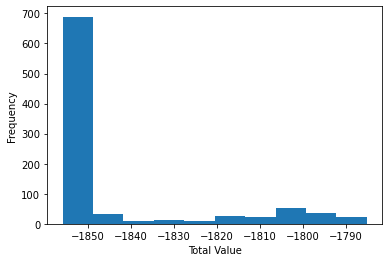

In [104]:
plt.hist(total_V)
plt.xlabel('Total Value')
plt.ylabel('Frequency')

Text(0, 0.5, 'Total Value')

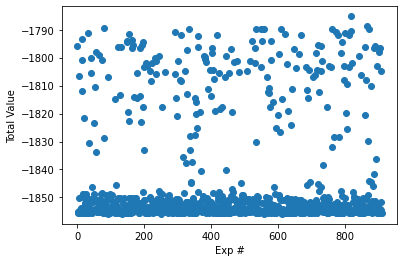

In [105]:
plt.plot(total_V, 'o')
plt.xlabel('Exp #')
plt.ylabel('Total Value')

In [106]:
min_idx = np.argmin(total_V)

In [107]:
min_svos = total_svos[min_idx]
min_log = total_logs[min_idx]

In [108]:
min_log

'/home/nbuckman/mpc_results/02_17_txe/23d1-093c-20210216-164440/23d1-093c-20210216-164440_00012/'

In [109]:
[s*180/np.pi for s in min_svos]

[63.40831830077262,
 15.246430605806172,
 22.416298498686857,
 9.005451402369845,
 63.40831830077262]

In [110]:
total_V[min_idx]

-1855.8945118218644

## Closest to Q-optimal

In [111]:
theta_optimal_deg = np.array([90, 14, 1.5, 64])
theta_optimal = np.pi / 180 * theta_optimal_deg

# SVO vs. Value

In [112]:
total_svos = np.array(total_svos)
total_V = np.array(total_V)

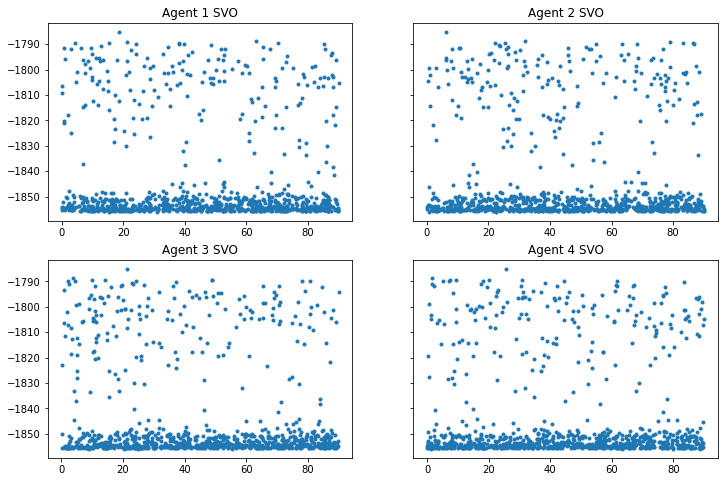

In [113]:
fig, axs = plt.subplots(2,2, figsize=(12,8), sharey=True)
axs[0,0].plot(180/np.pi * total_svos[:,1], total_V, '.')
axs[0,0].set_title('Agent 1 SVO')
axs[0,1].plot(180/np.pi * total_svos[:,2], total_V, '.')
axs[0,1].set_title('Agent 2 SVO')

axs[1,0].plot(180/np.pi * total_svos[:,3], total_V, '.')
axs[1,0].set_title('Agent 3 SVO')
axs[1,1].plot(180/np.pi * total_svos[:,4], total_V, '.')
axs[1,1].set_title('Agent 4 SVO')

# plt.xlabel('SVO [deg]')
# plt.ylabel('Value')
plt.show()